#**Step 01: Clone the YOLOv10 Github Repo**

In [1]:
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10


Cloning into 'yolov10'...
remote: Enumerating objects: 20332, done.
remote: Counting objects: 100% (2446/2446), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 20332 (delta 2317), reused 2197 (delta 2196), pack-reused 17886 (from 1)
Receiving objects: 100% (20332/20332), 11.14 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (14337/14337), done.
/content/yolov10


#**Step 02: Install All the Requried Packages**

In [2]:
!pip install -q .

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#**Step 03: Download the Pretrained Model Weights**

In [3]:
import os
import urllib.request
#Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), 'weights')
os.makedirs(weights_dir, exist_ok = True)
#urls of the weights file
urls = ["https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt"]

#Download each file
for url in urls:
  filename = os.path.basename(url)
  filepath = os.path.join(weights_dir, filename)
  urllib.request.urlretrieve(url, filepath)
  print(f"Downloaded: {filepath}")

Downloaded: /content/yolov10/weights/yolov10n.pt
Downloaded: /content/yolov10/weights/yolov10s.pt
Downloaded: /content/yolov10/weights/yolov10m.pt
Downloaded: /content/yolov10/weights/yolov10b.pt
Downloaded: /content/yolov10/weights/yolov10l.pt
Downloaded: /content/yolov10/weights/yolov10x.pt


#**Step 04: Download the Dataset from Roboflow**

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("moin").project("car_license_plates")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car_License_Plates-2 in yolov8:: 100%|██████████| 1436/1436 [00:00<00:00, 6866.16it/s]


In [5]:
%cd '/content/yolov10'

/content/yolov10


#**Step 05: Train Custom Model**

In [6]:
!yolo task=detect mode=train epochs=120 batch=16 plots=True model='weights/yolov10n.pt' data='Car_License_Plates/data.yaml'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

##**Step 06: Examine Training Results**

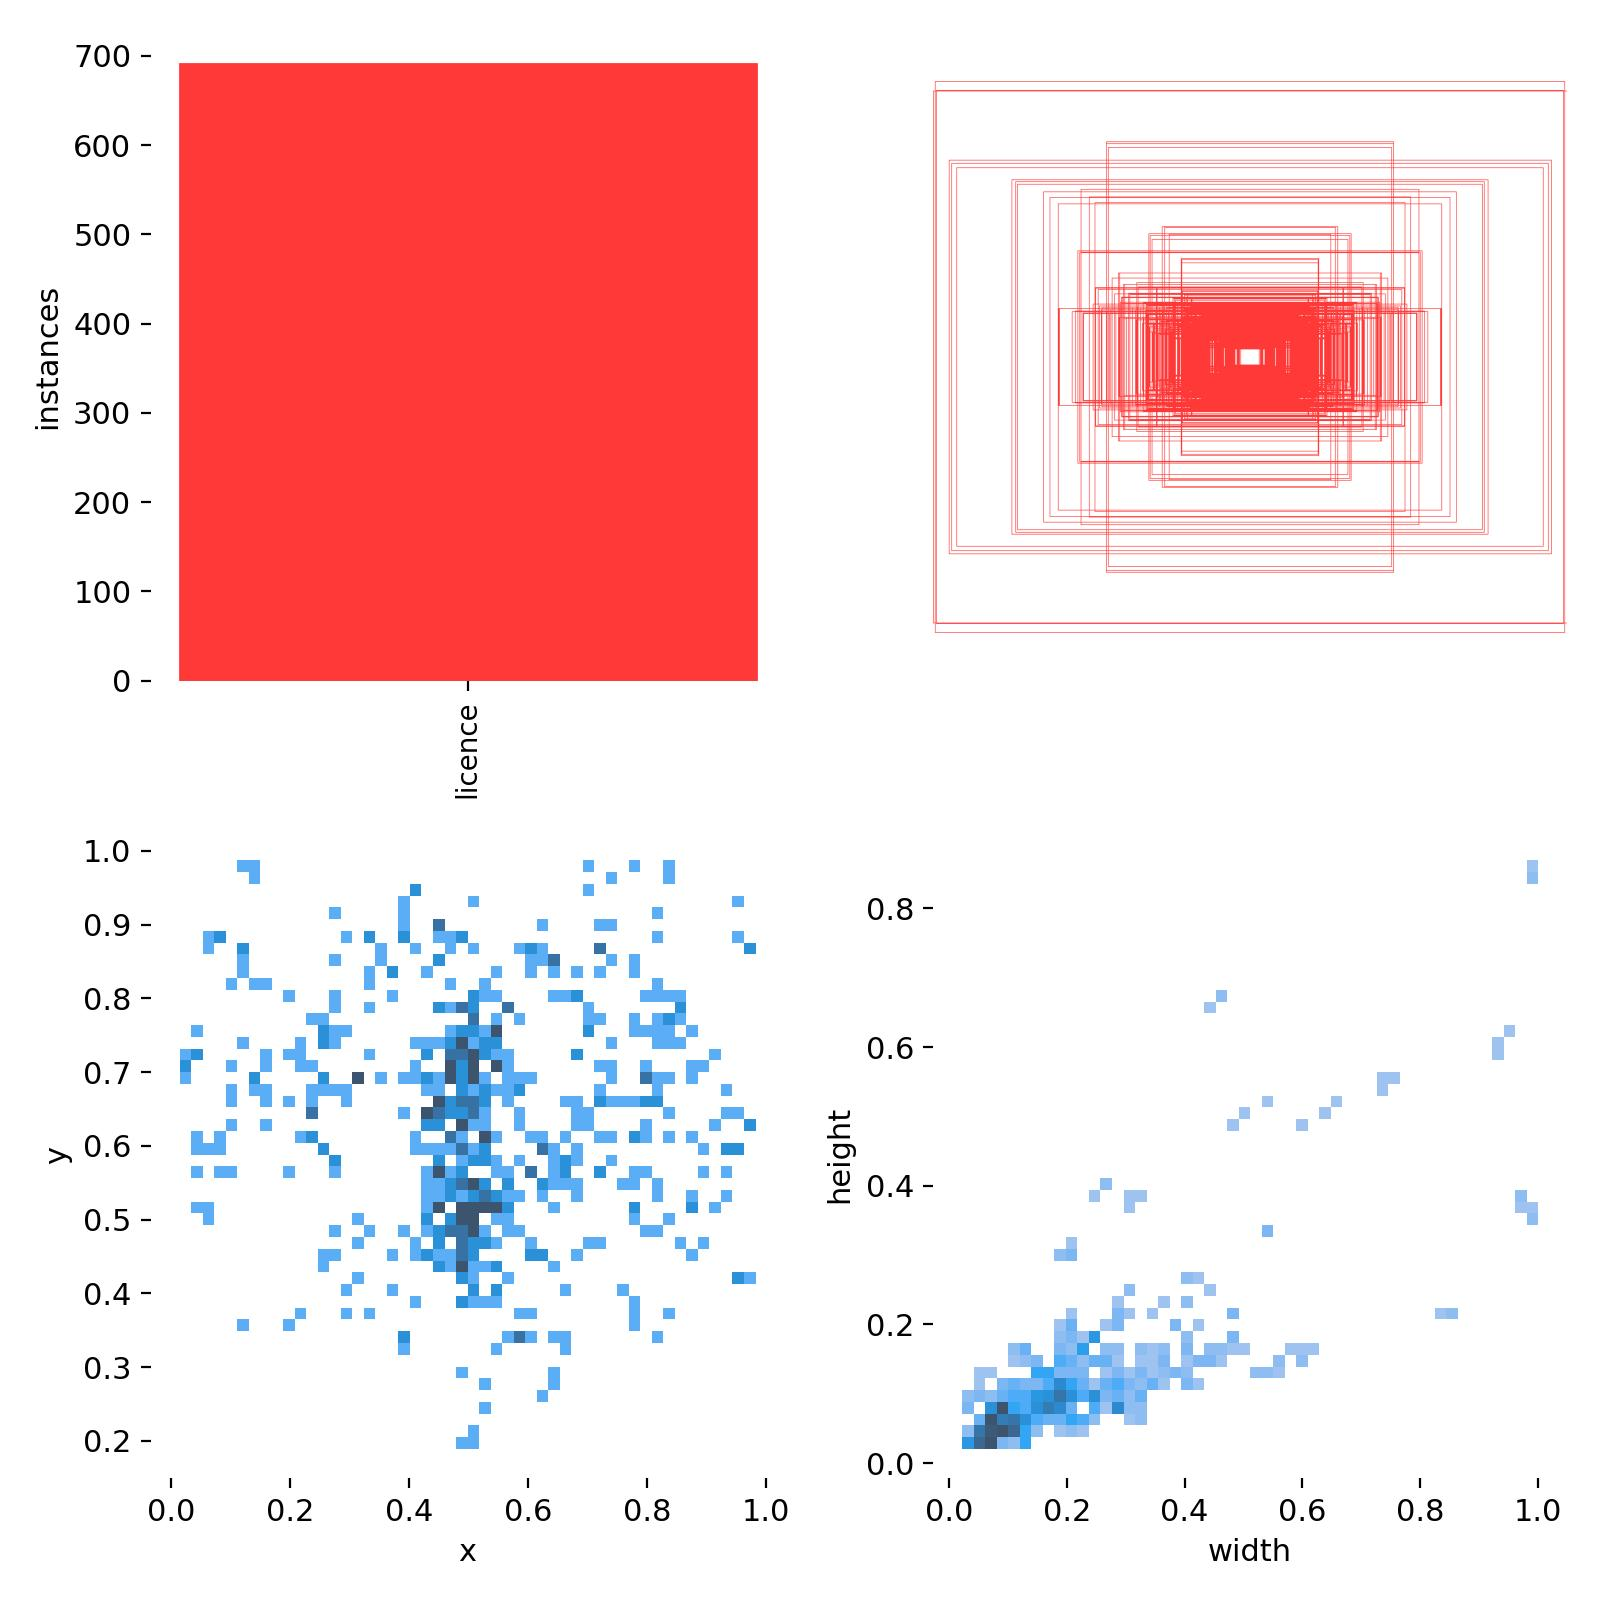

In [8]:
from IPython.display import Image

Image("/content/yolov10/runs/detect/train/labels.jpg")

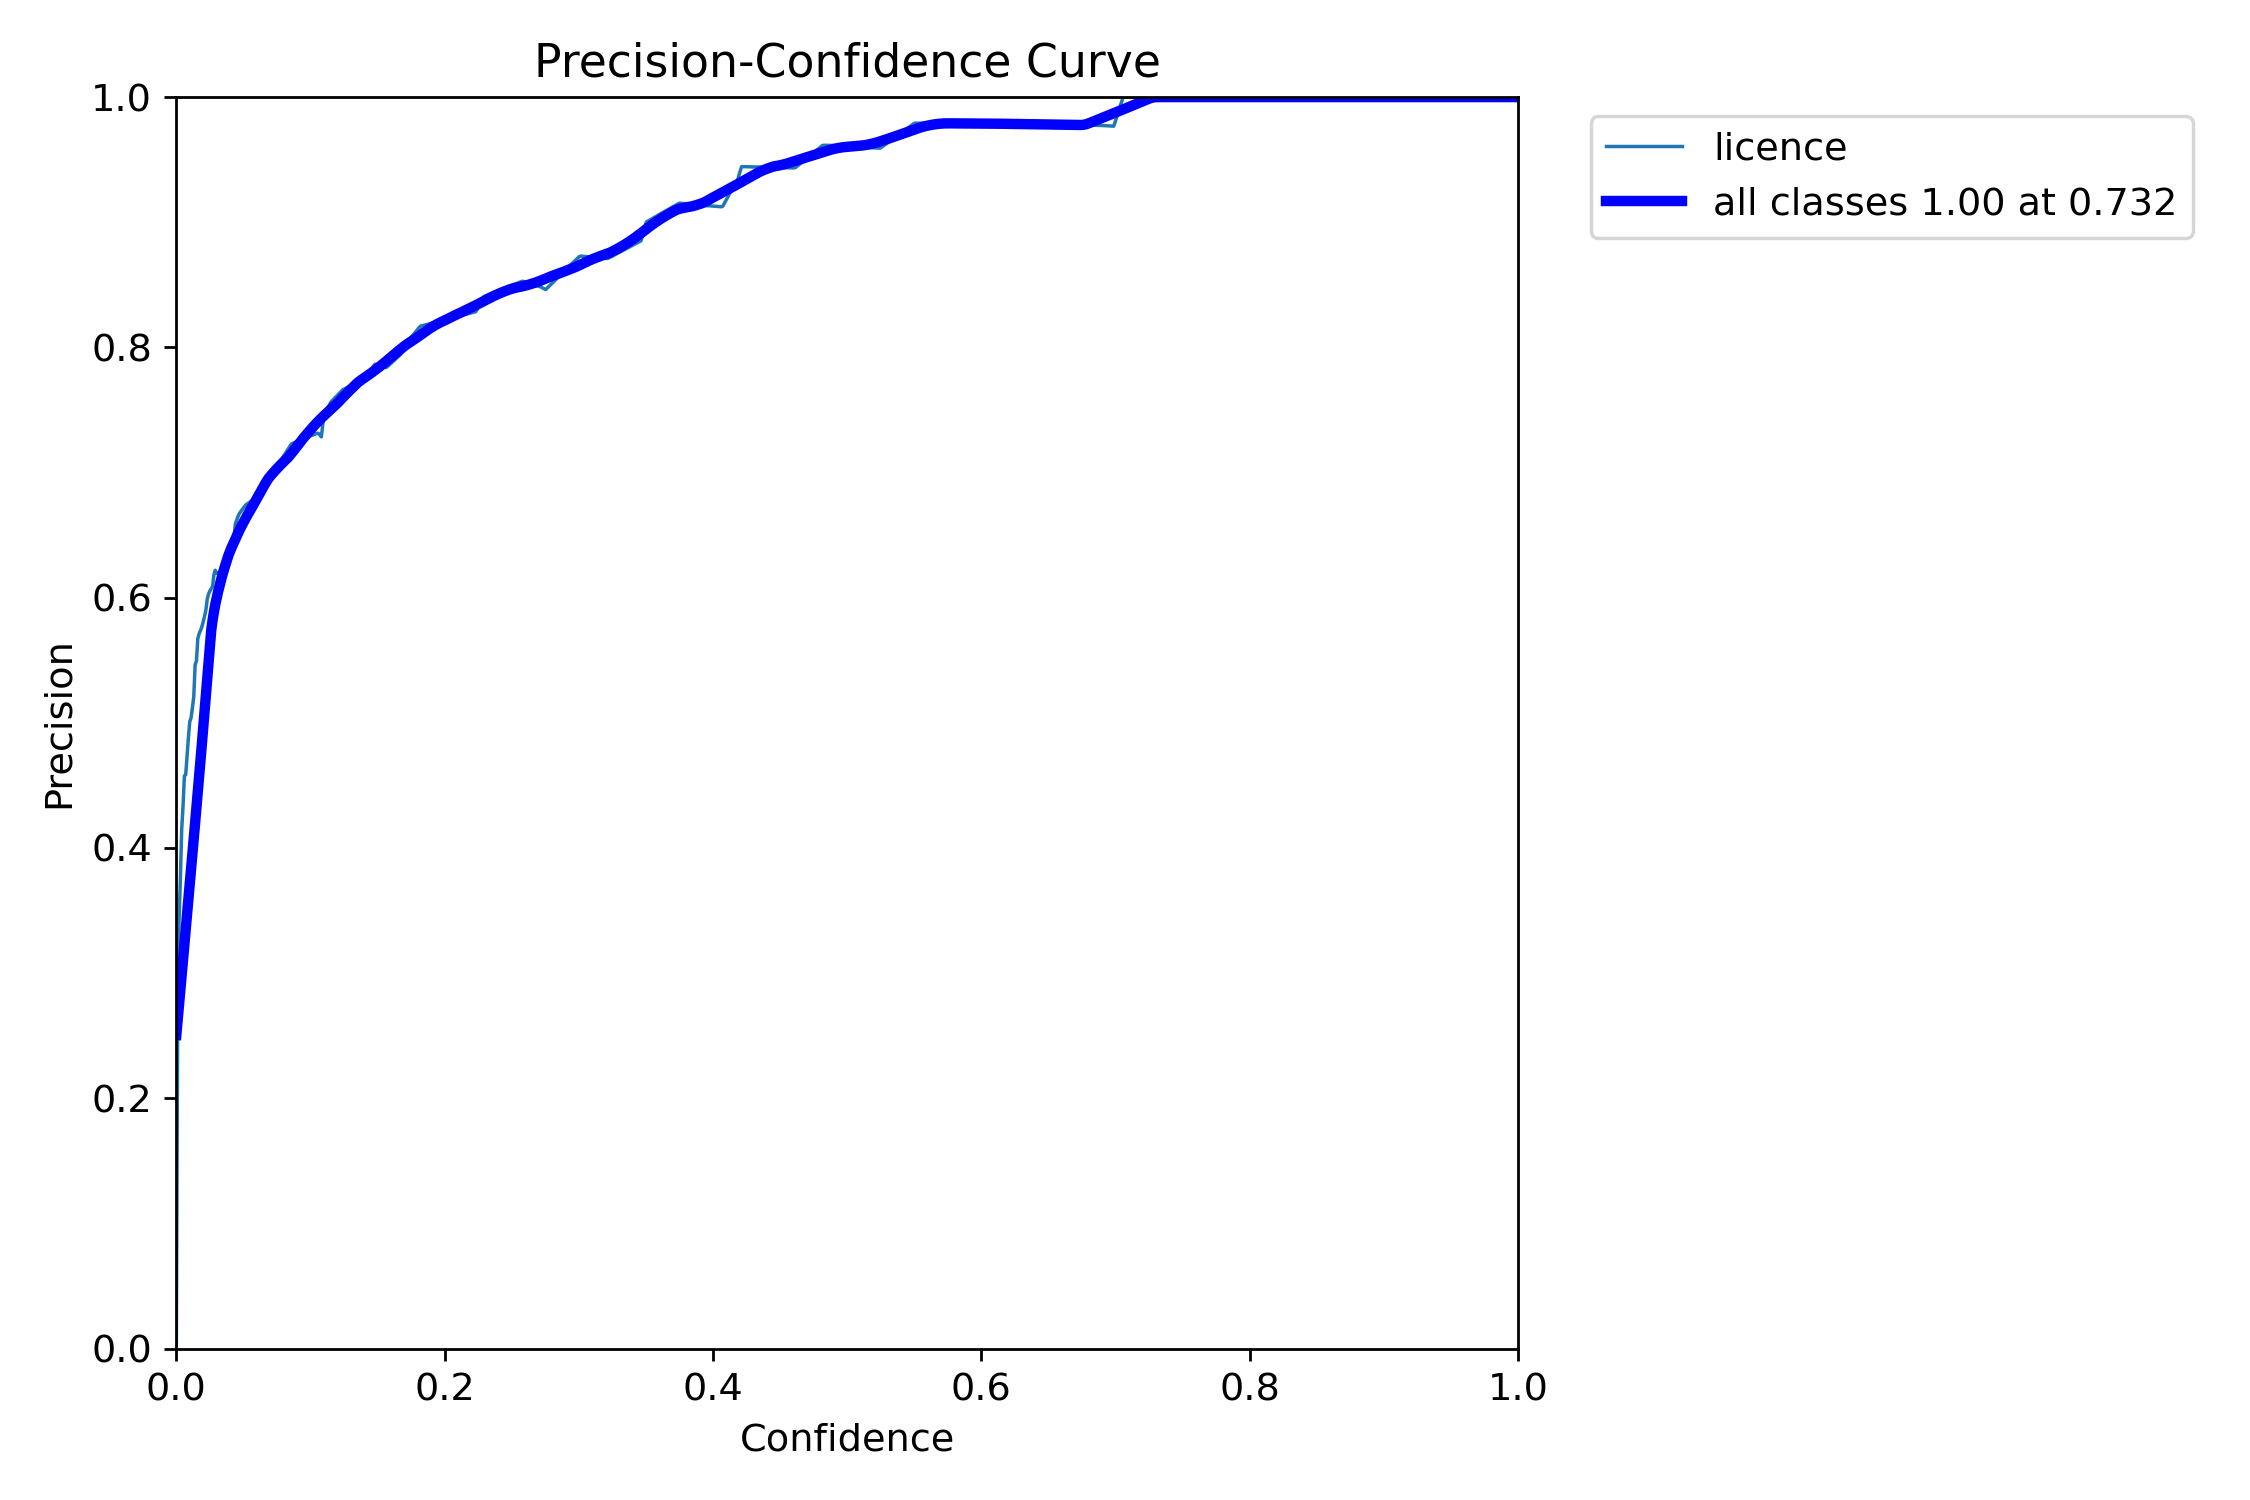

In [9]:
Image("/content/yolov10/runs/detect/train/P_curve.png")

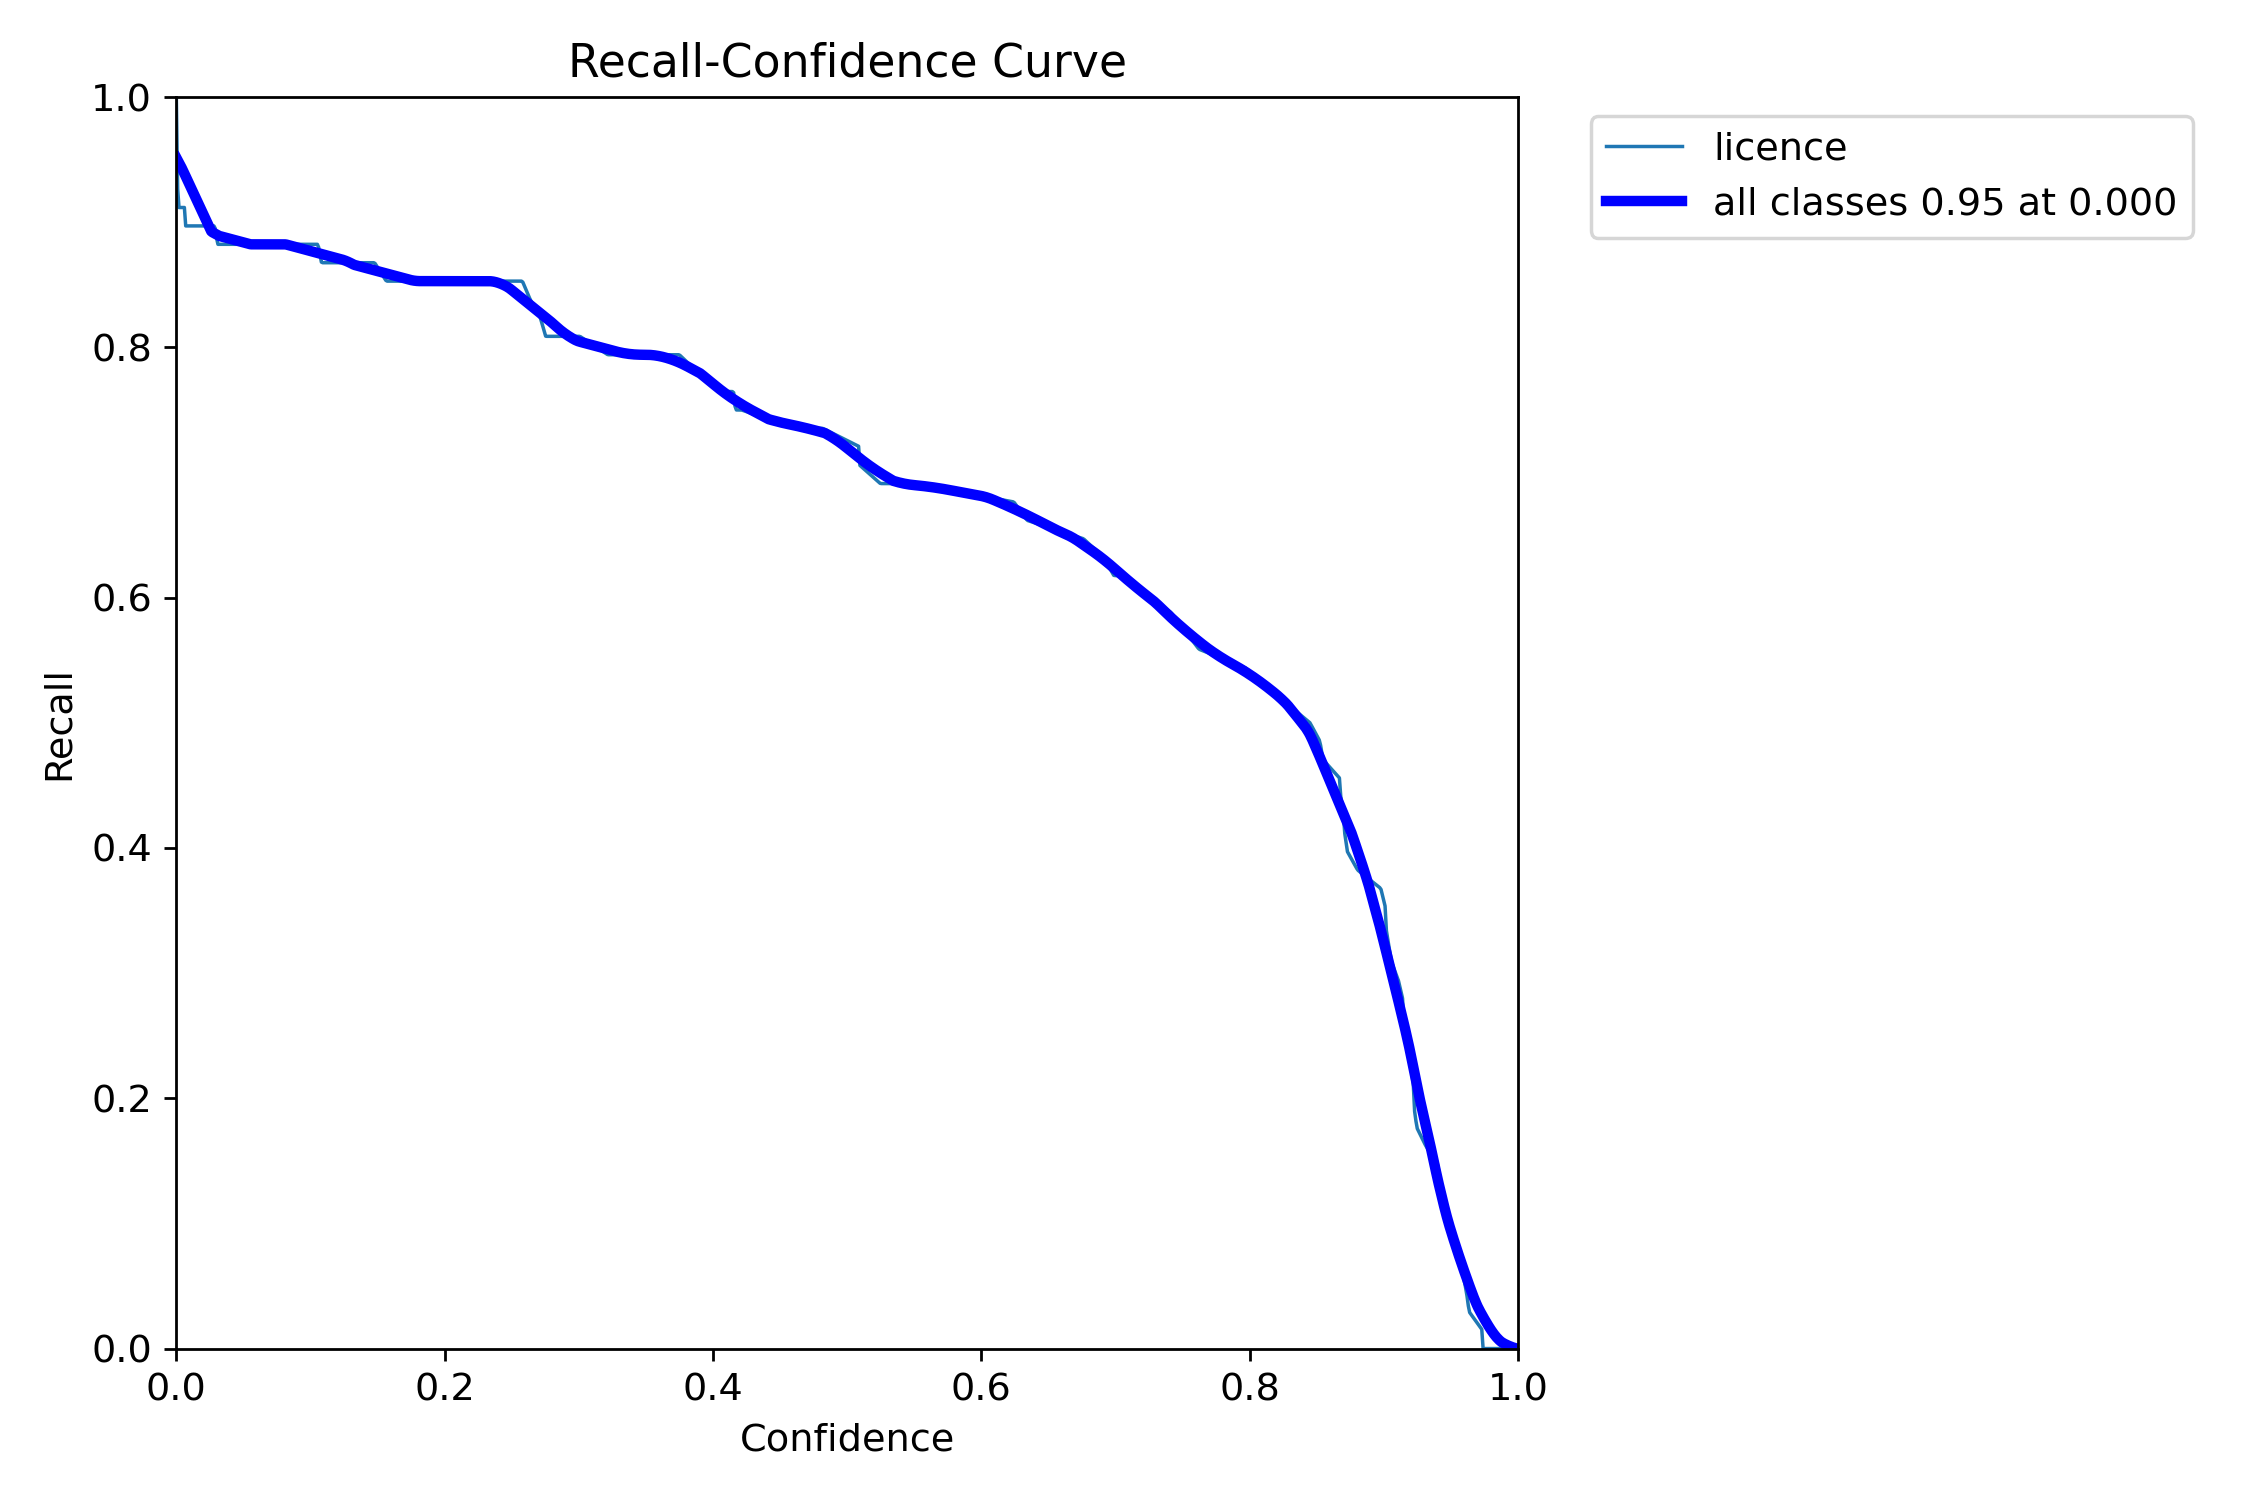

In [10]:
Image("/content/yolov10/runs/detect/train/R_curve.png")

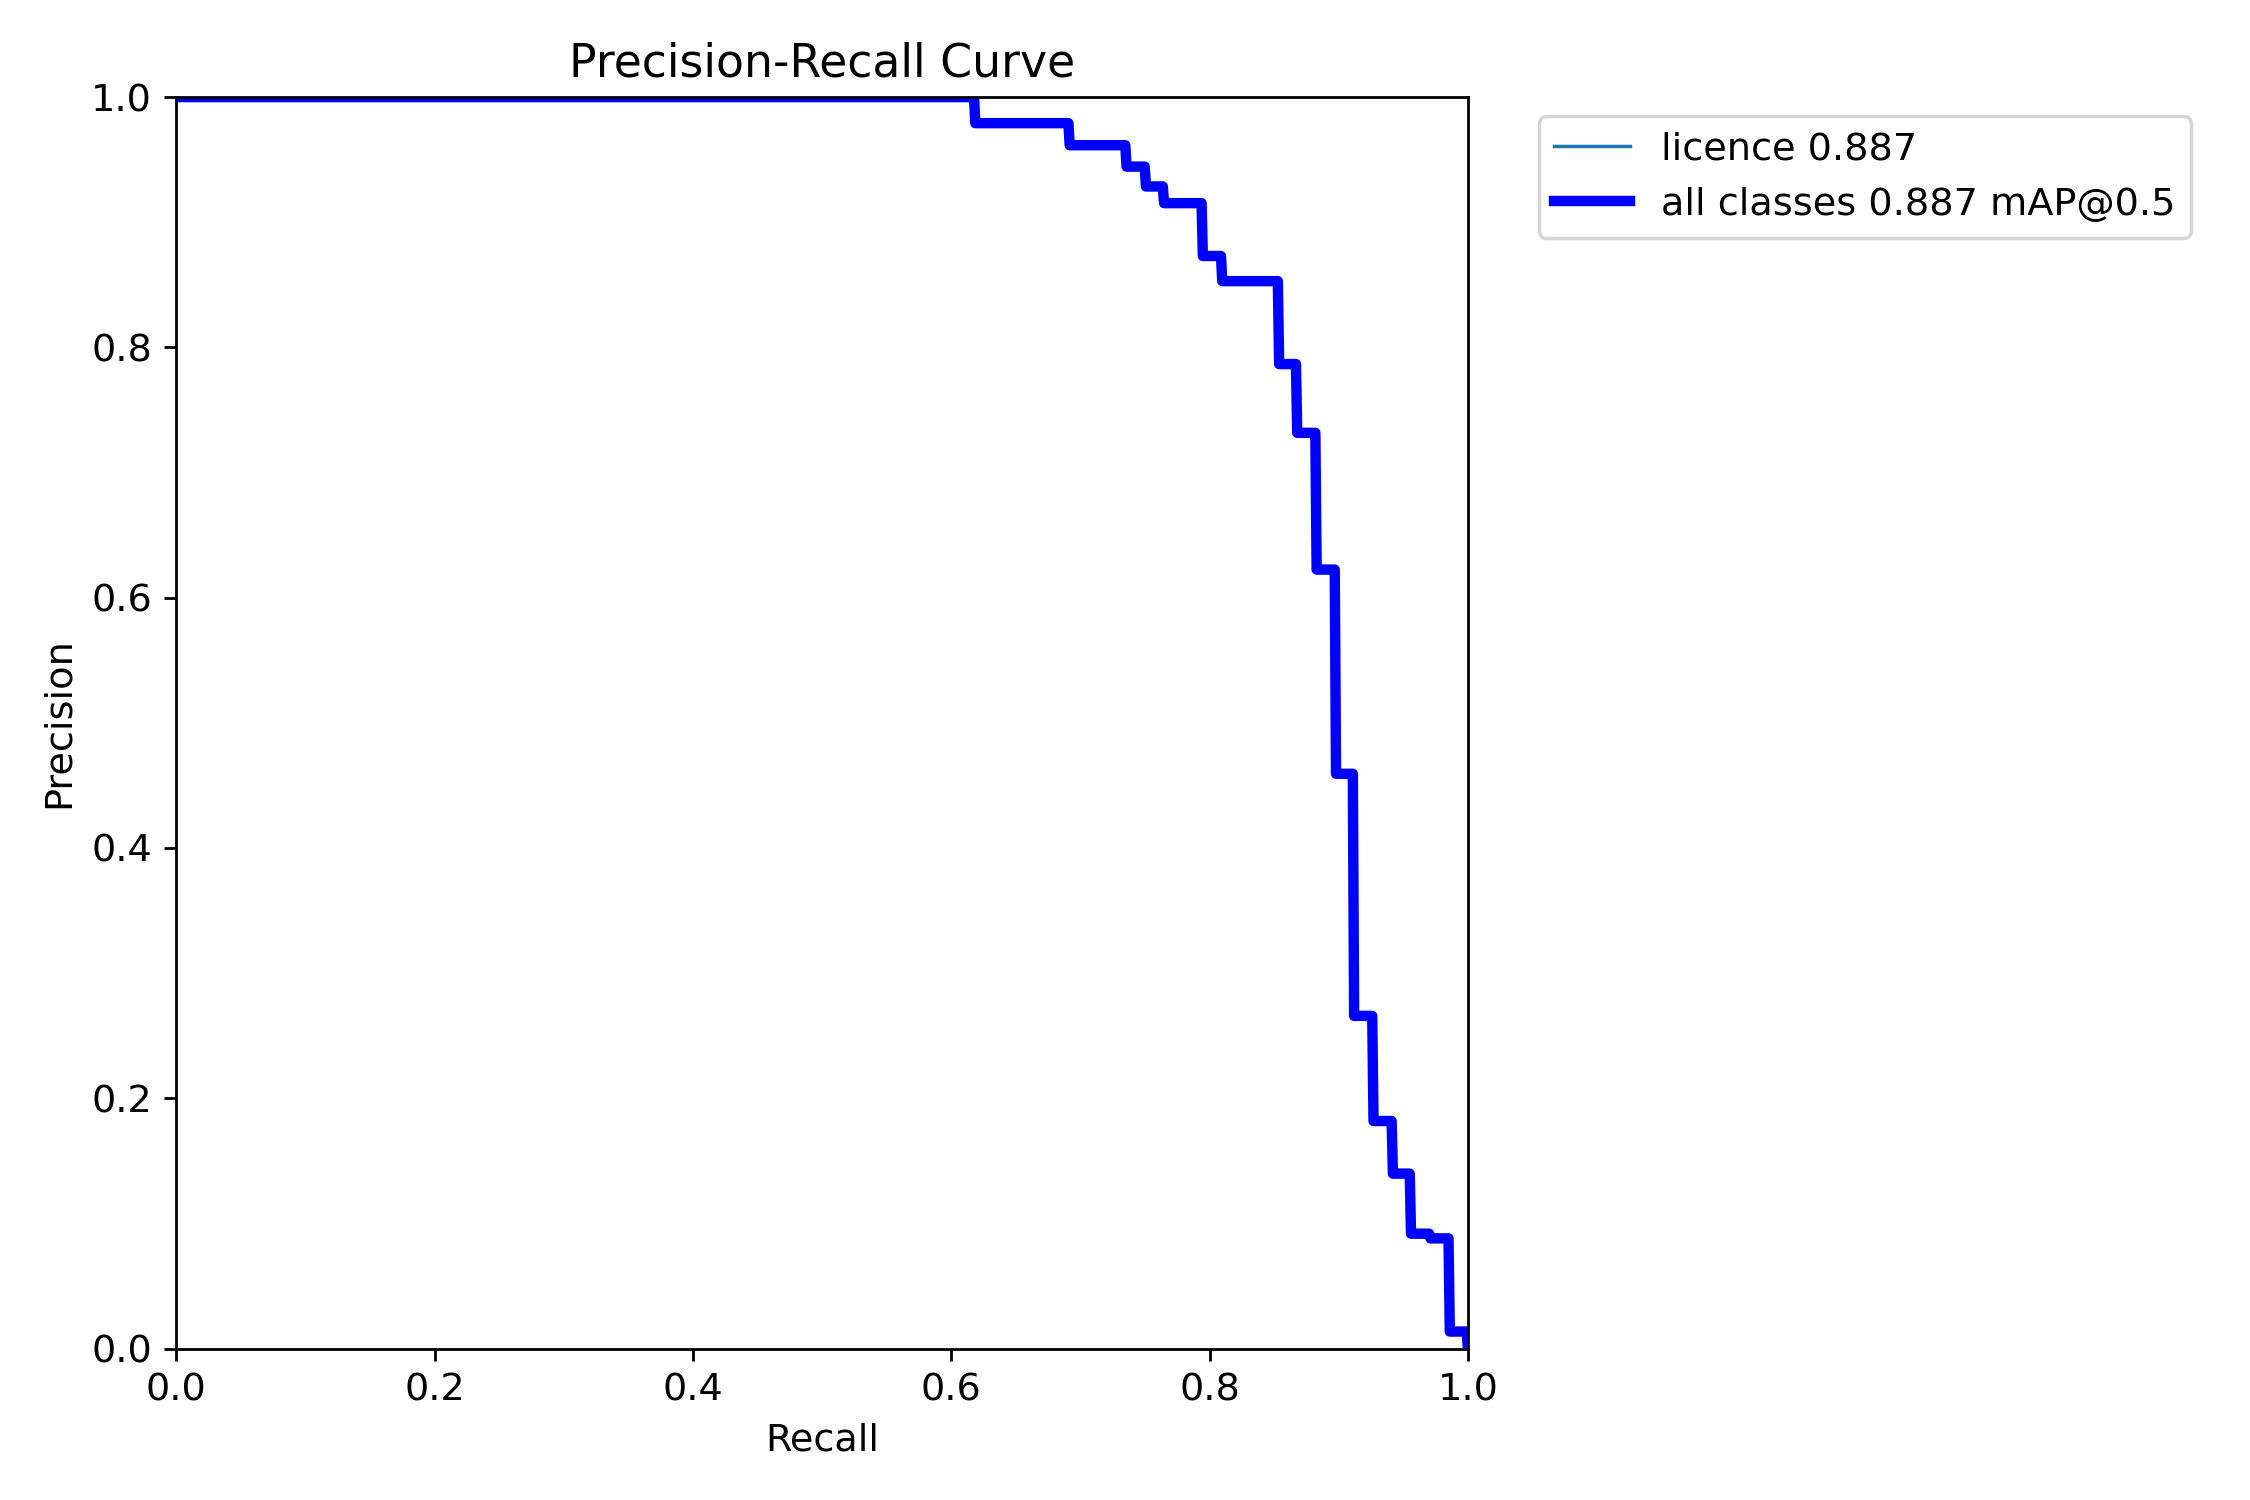

In [11]:
Image("/content/yolov10/runs/detect/train/PR_curve.png")

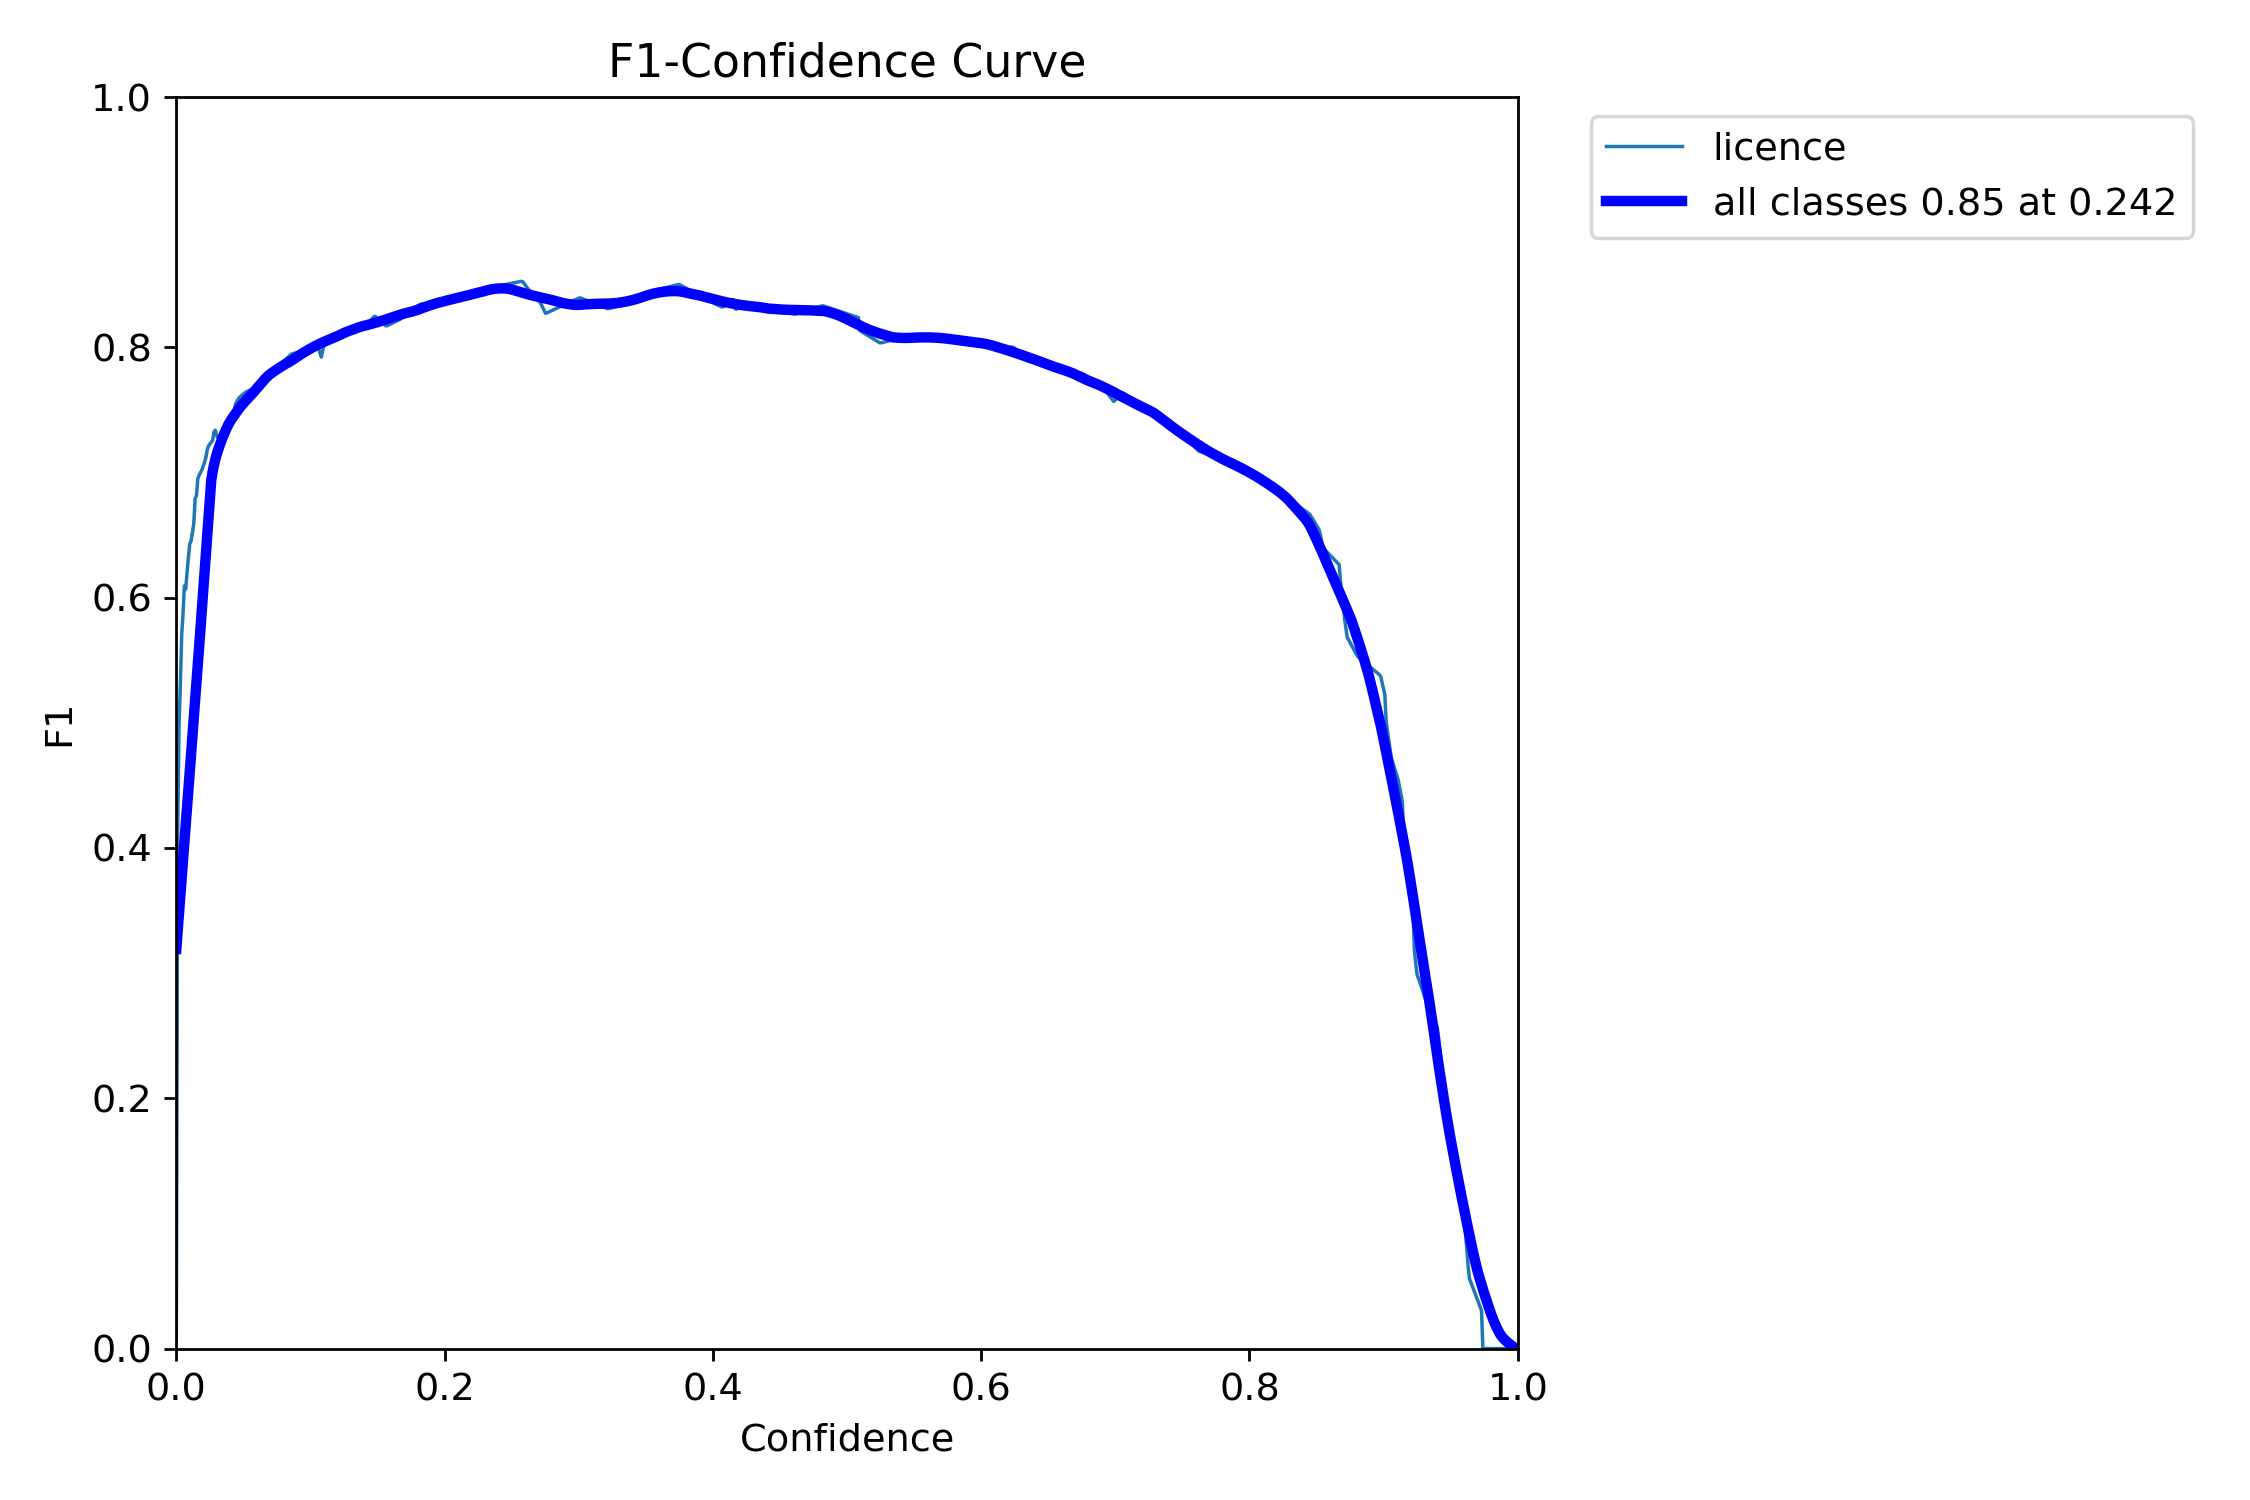

In [12]:
Image("/content/yolov10/runs/detect/train/F1_curve.png")

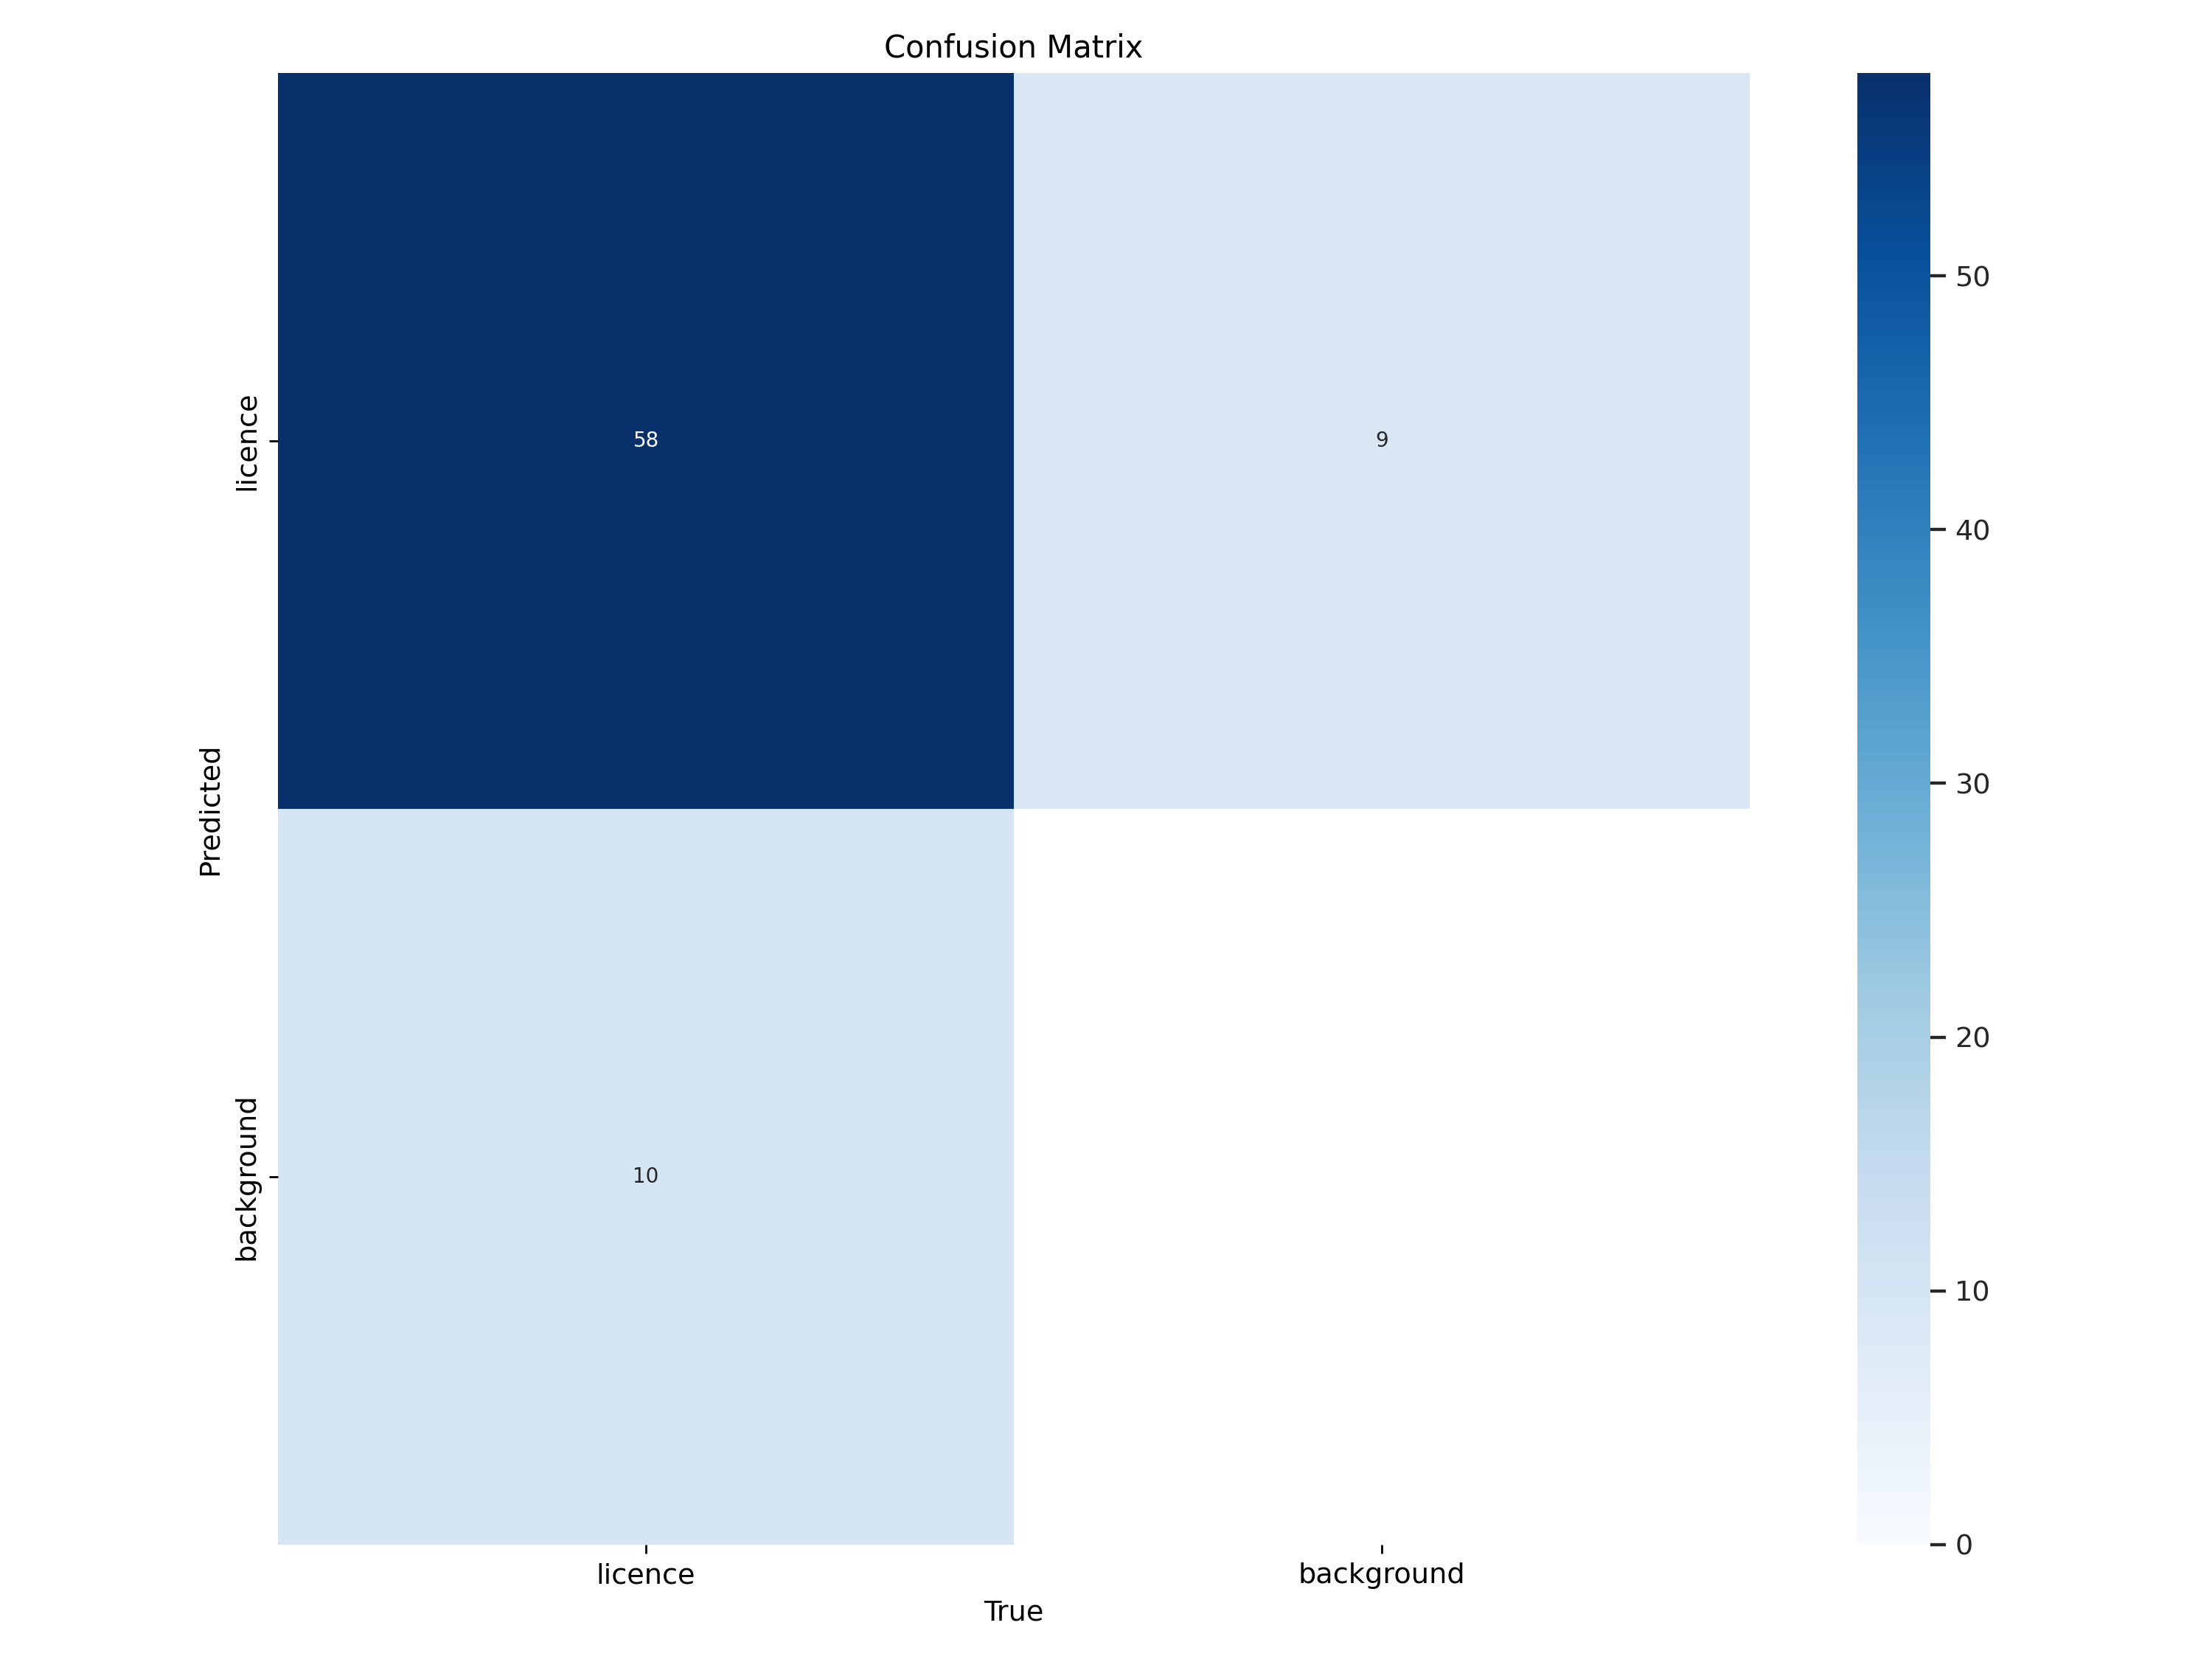

In [13]:
Image("/content/yolov10/runs/detect/train/confusion_matrix.png")

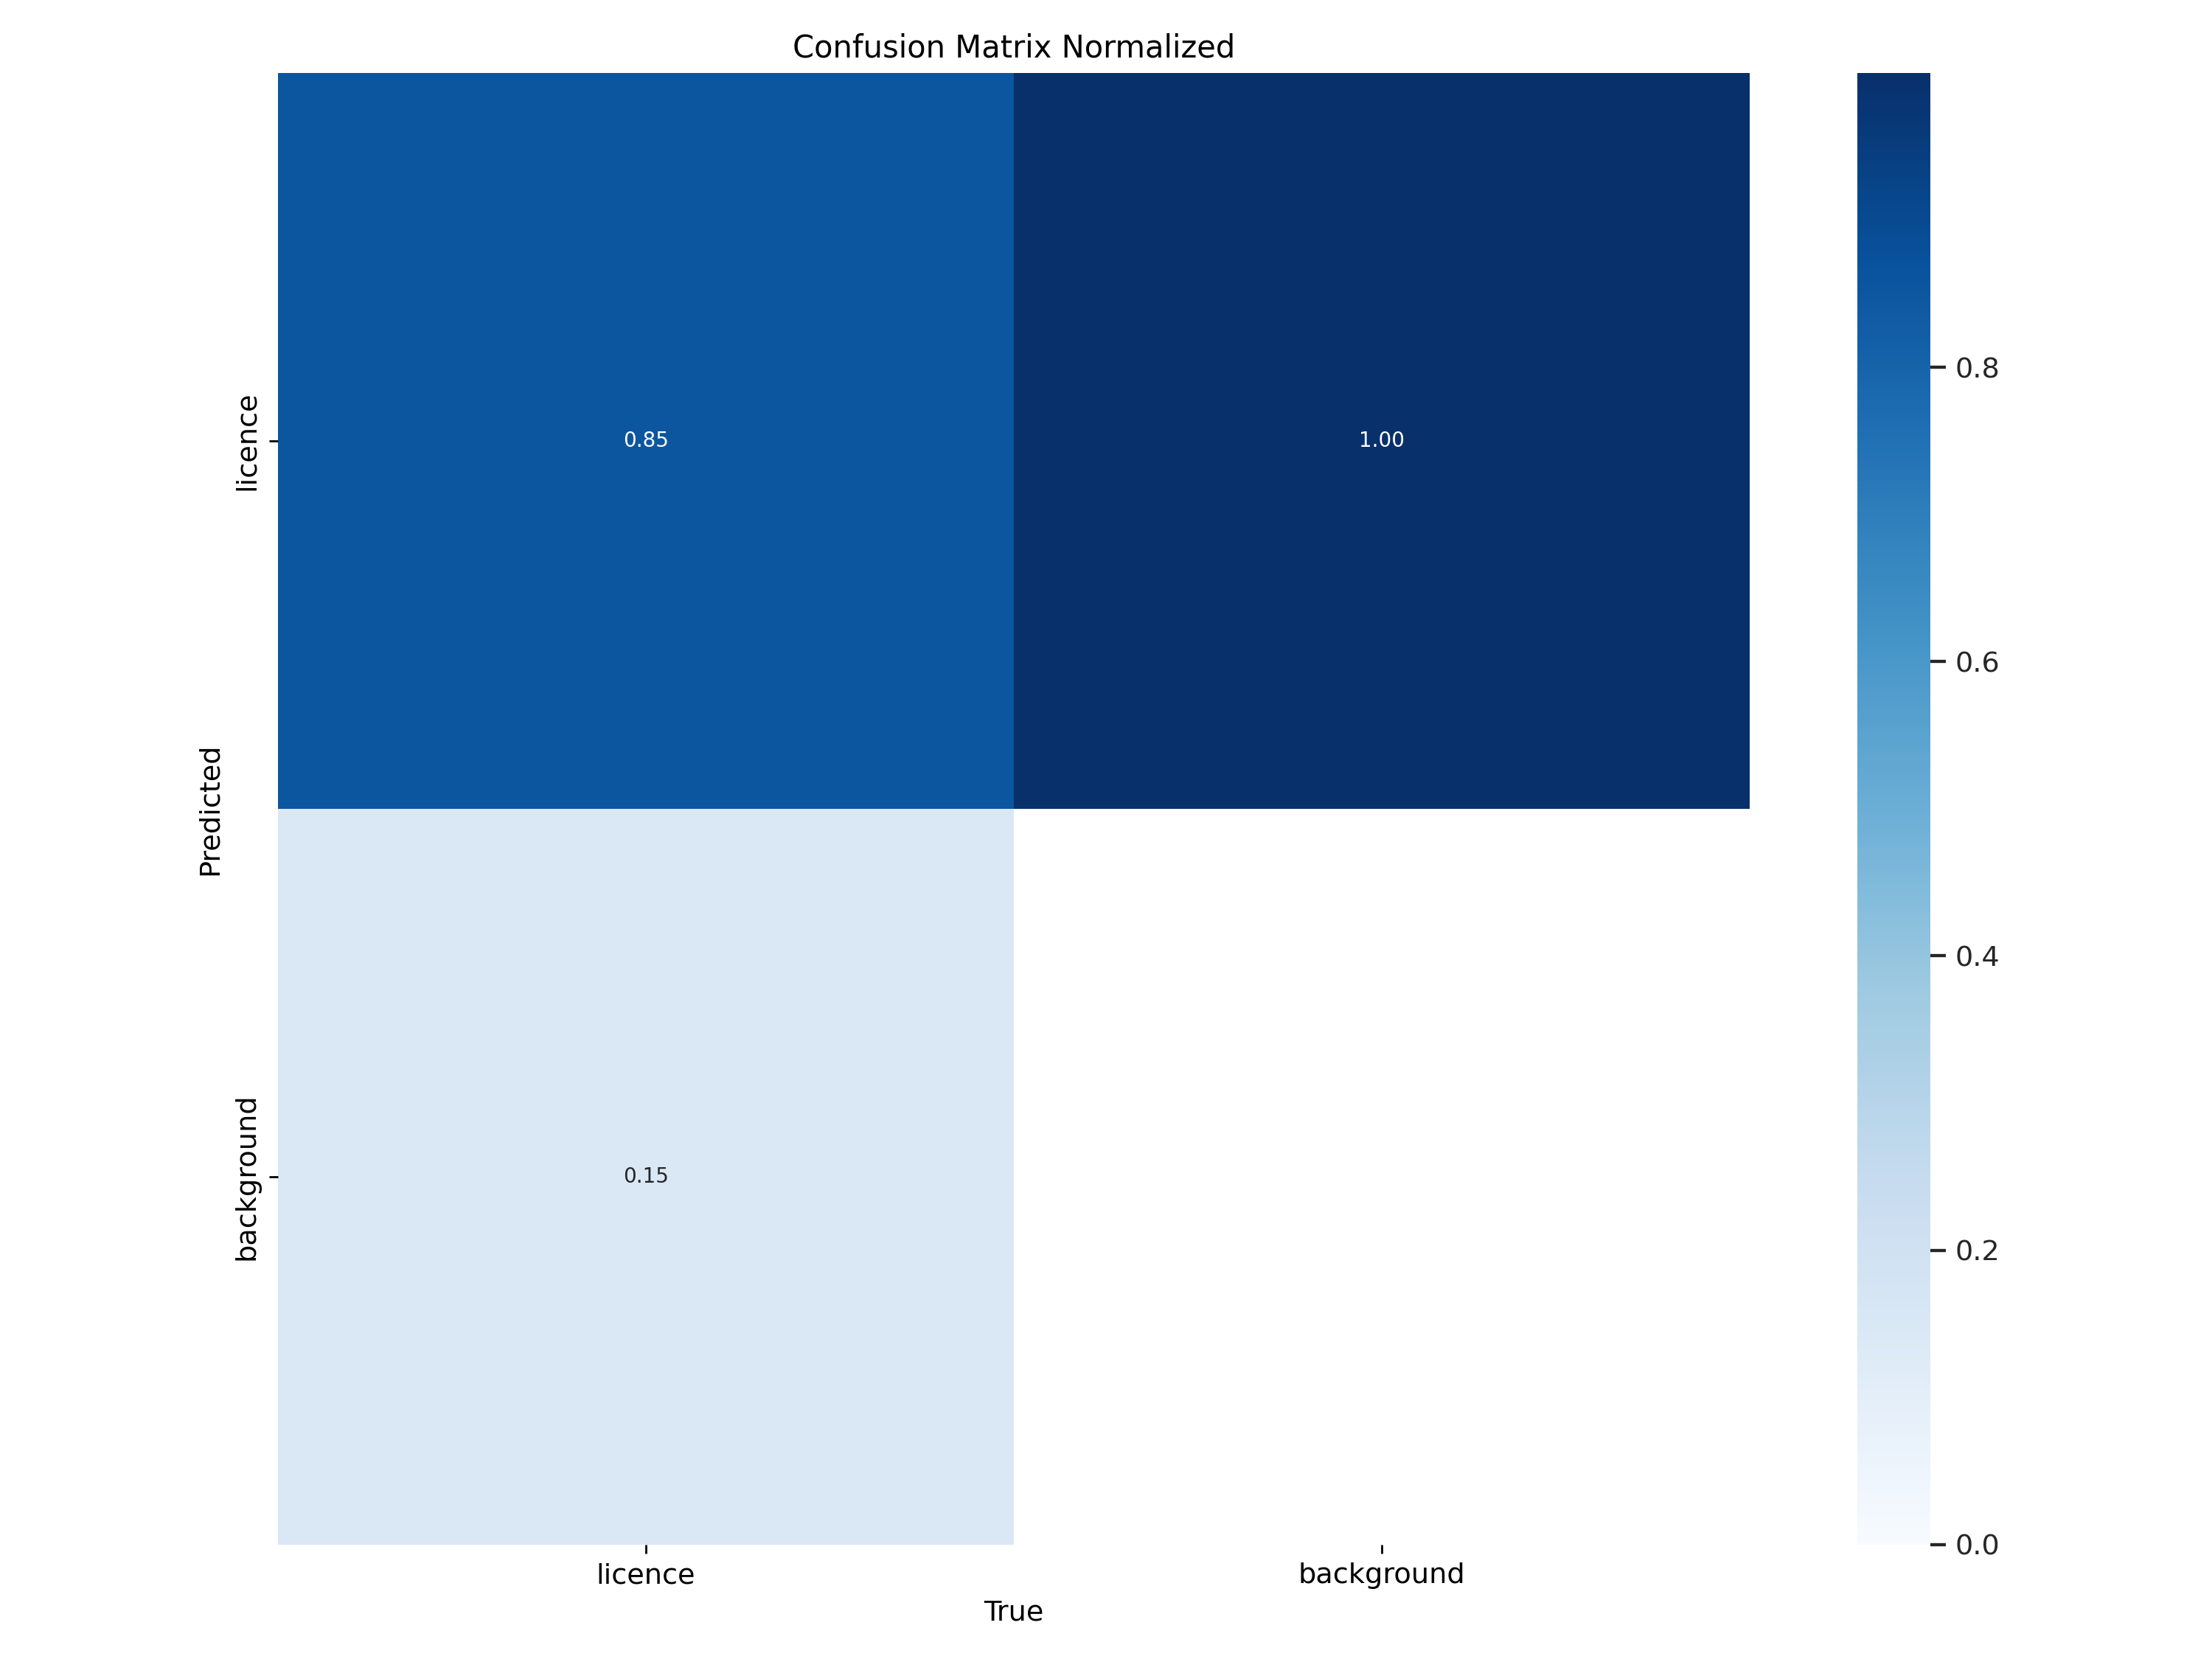

In [14]:
Image("/content/yolov10/runs/detect/train/confusion_matrix_normalized.png")

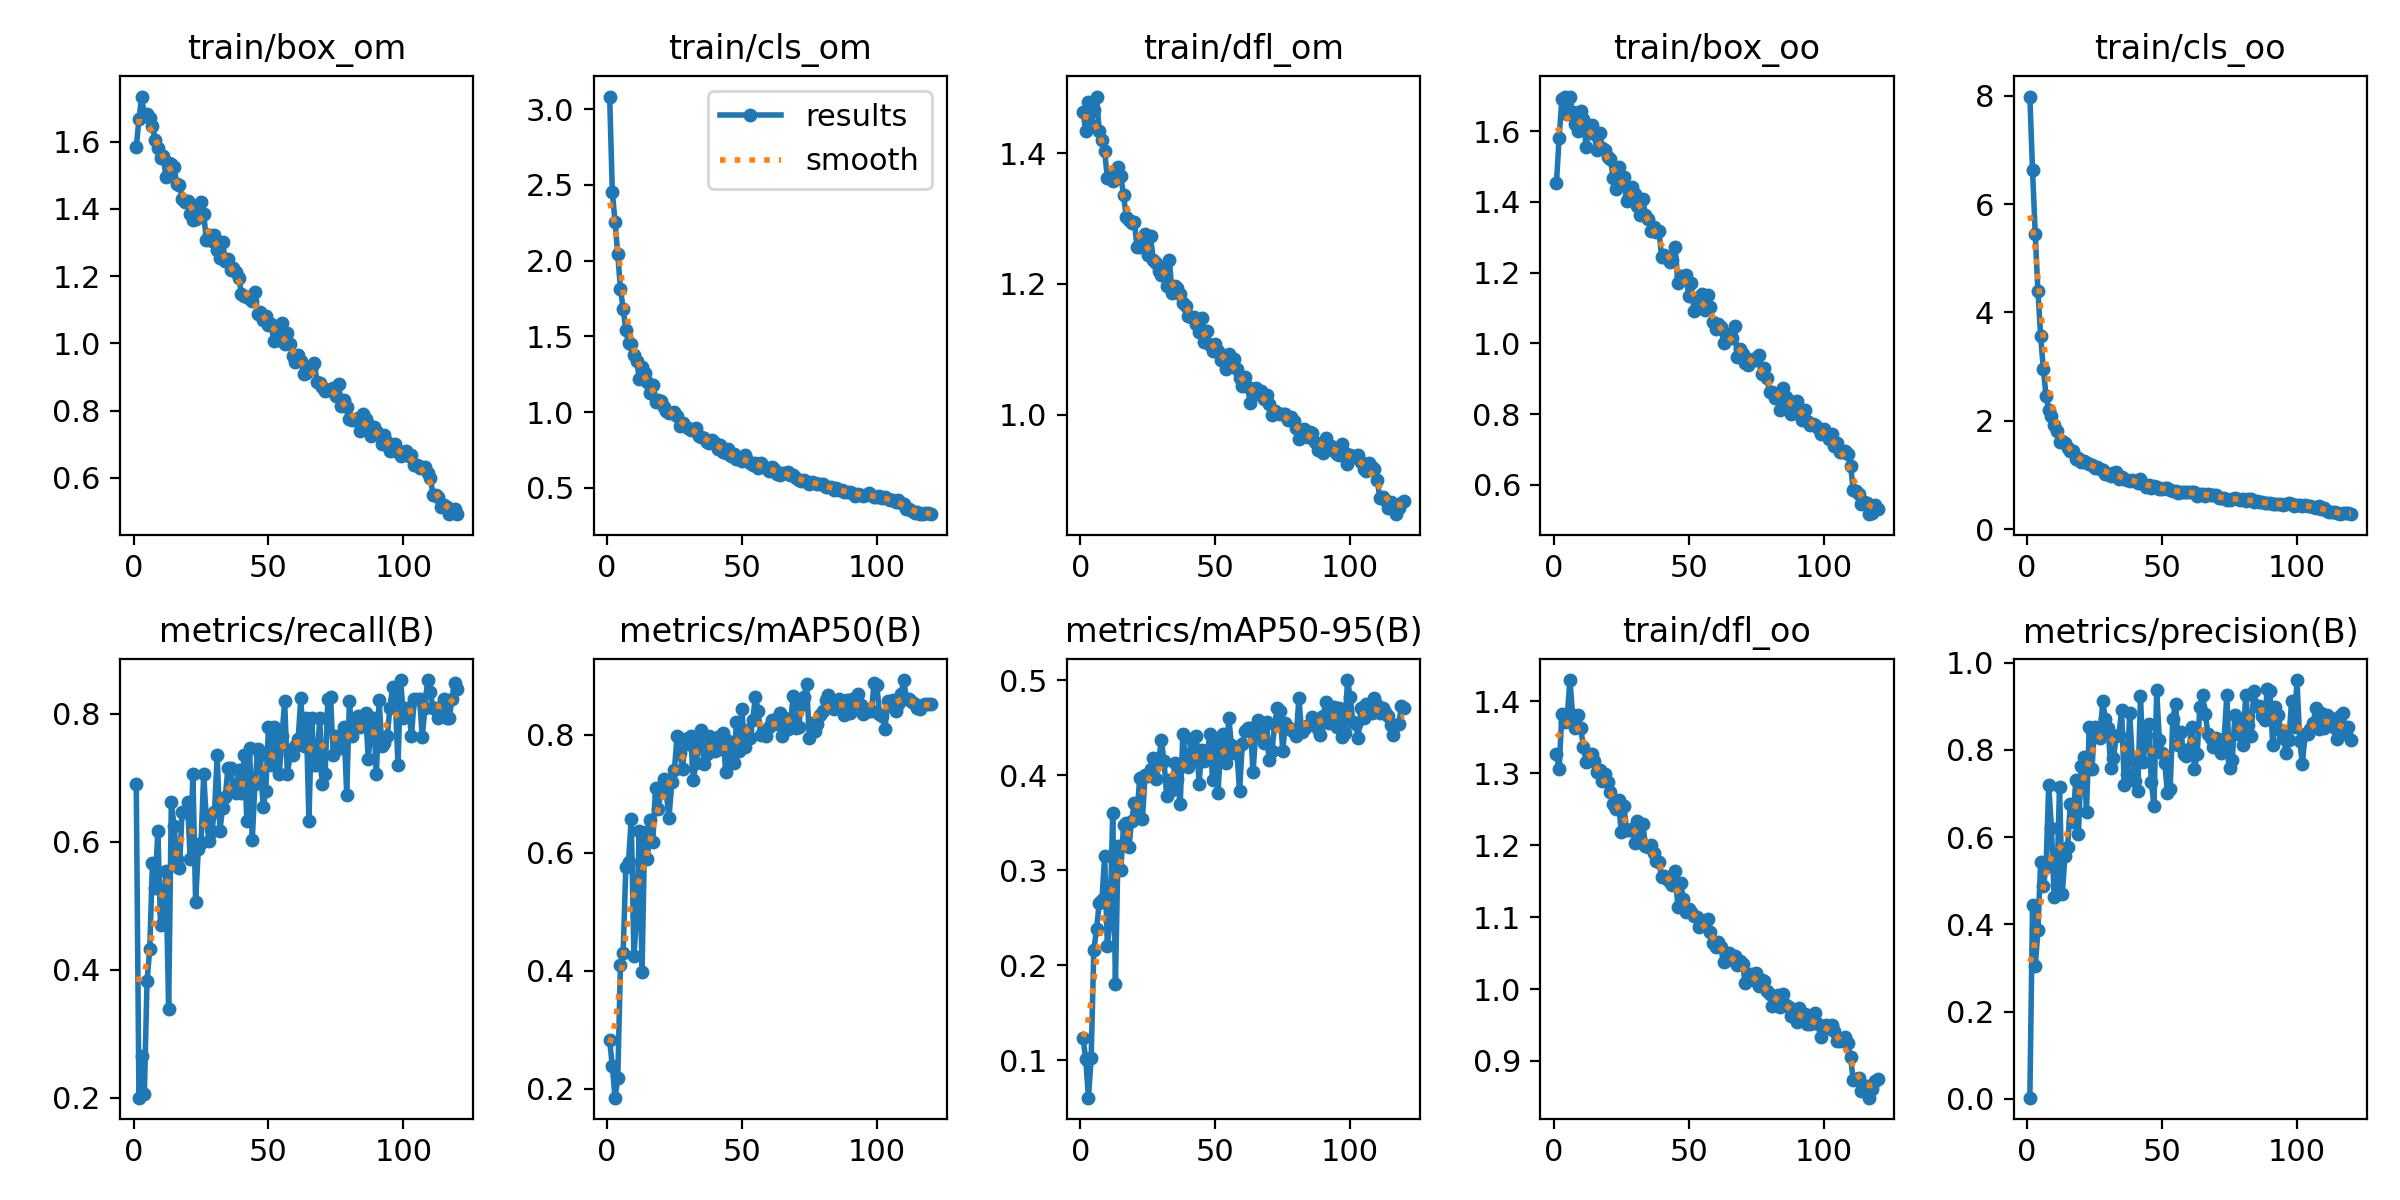

In [15]:
Image("/content/yolov10/runs/detect/train/results.png")

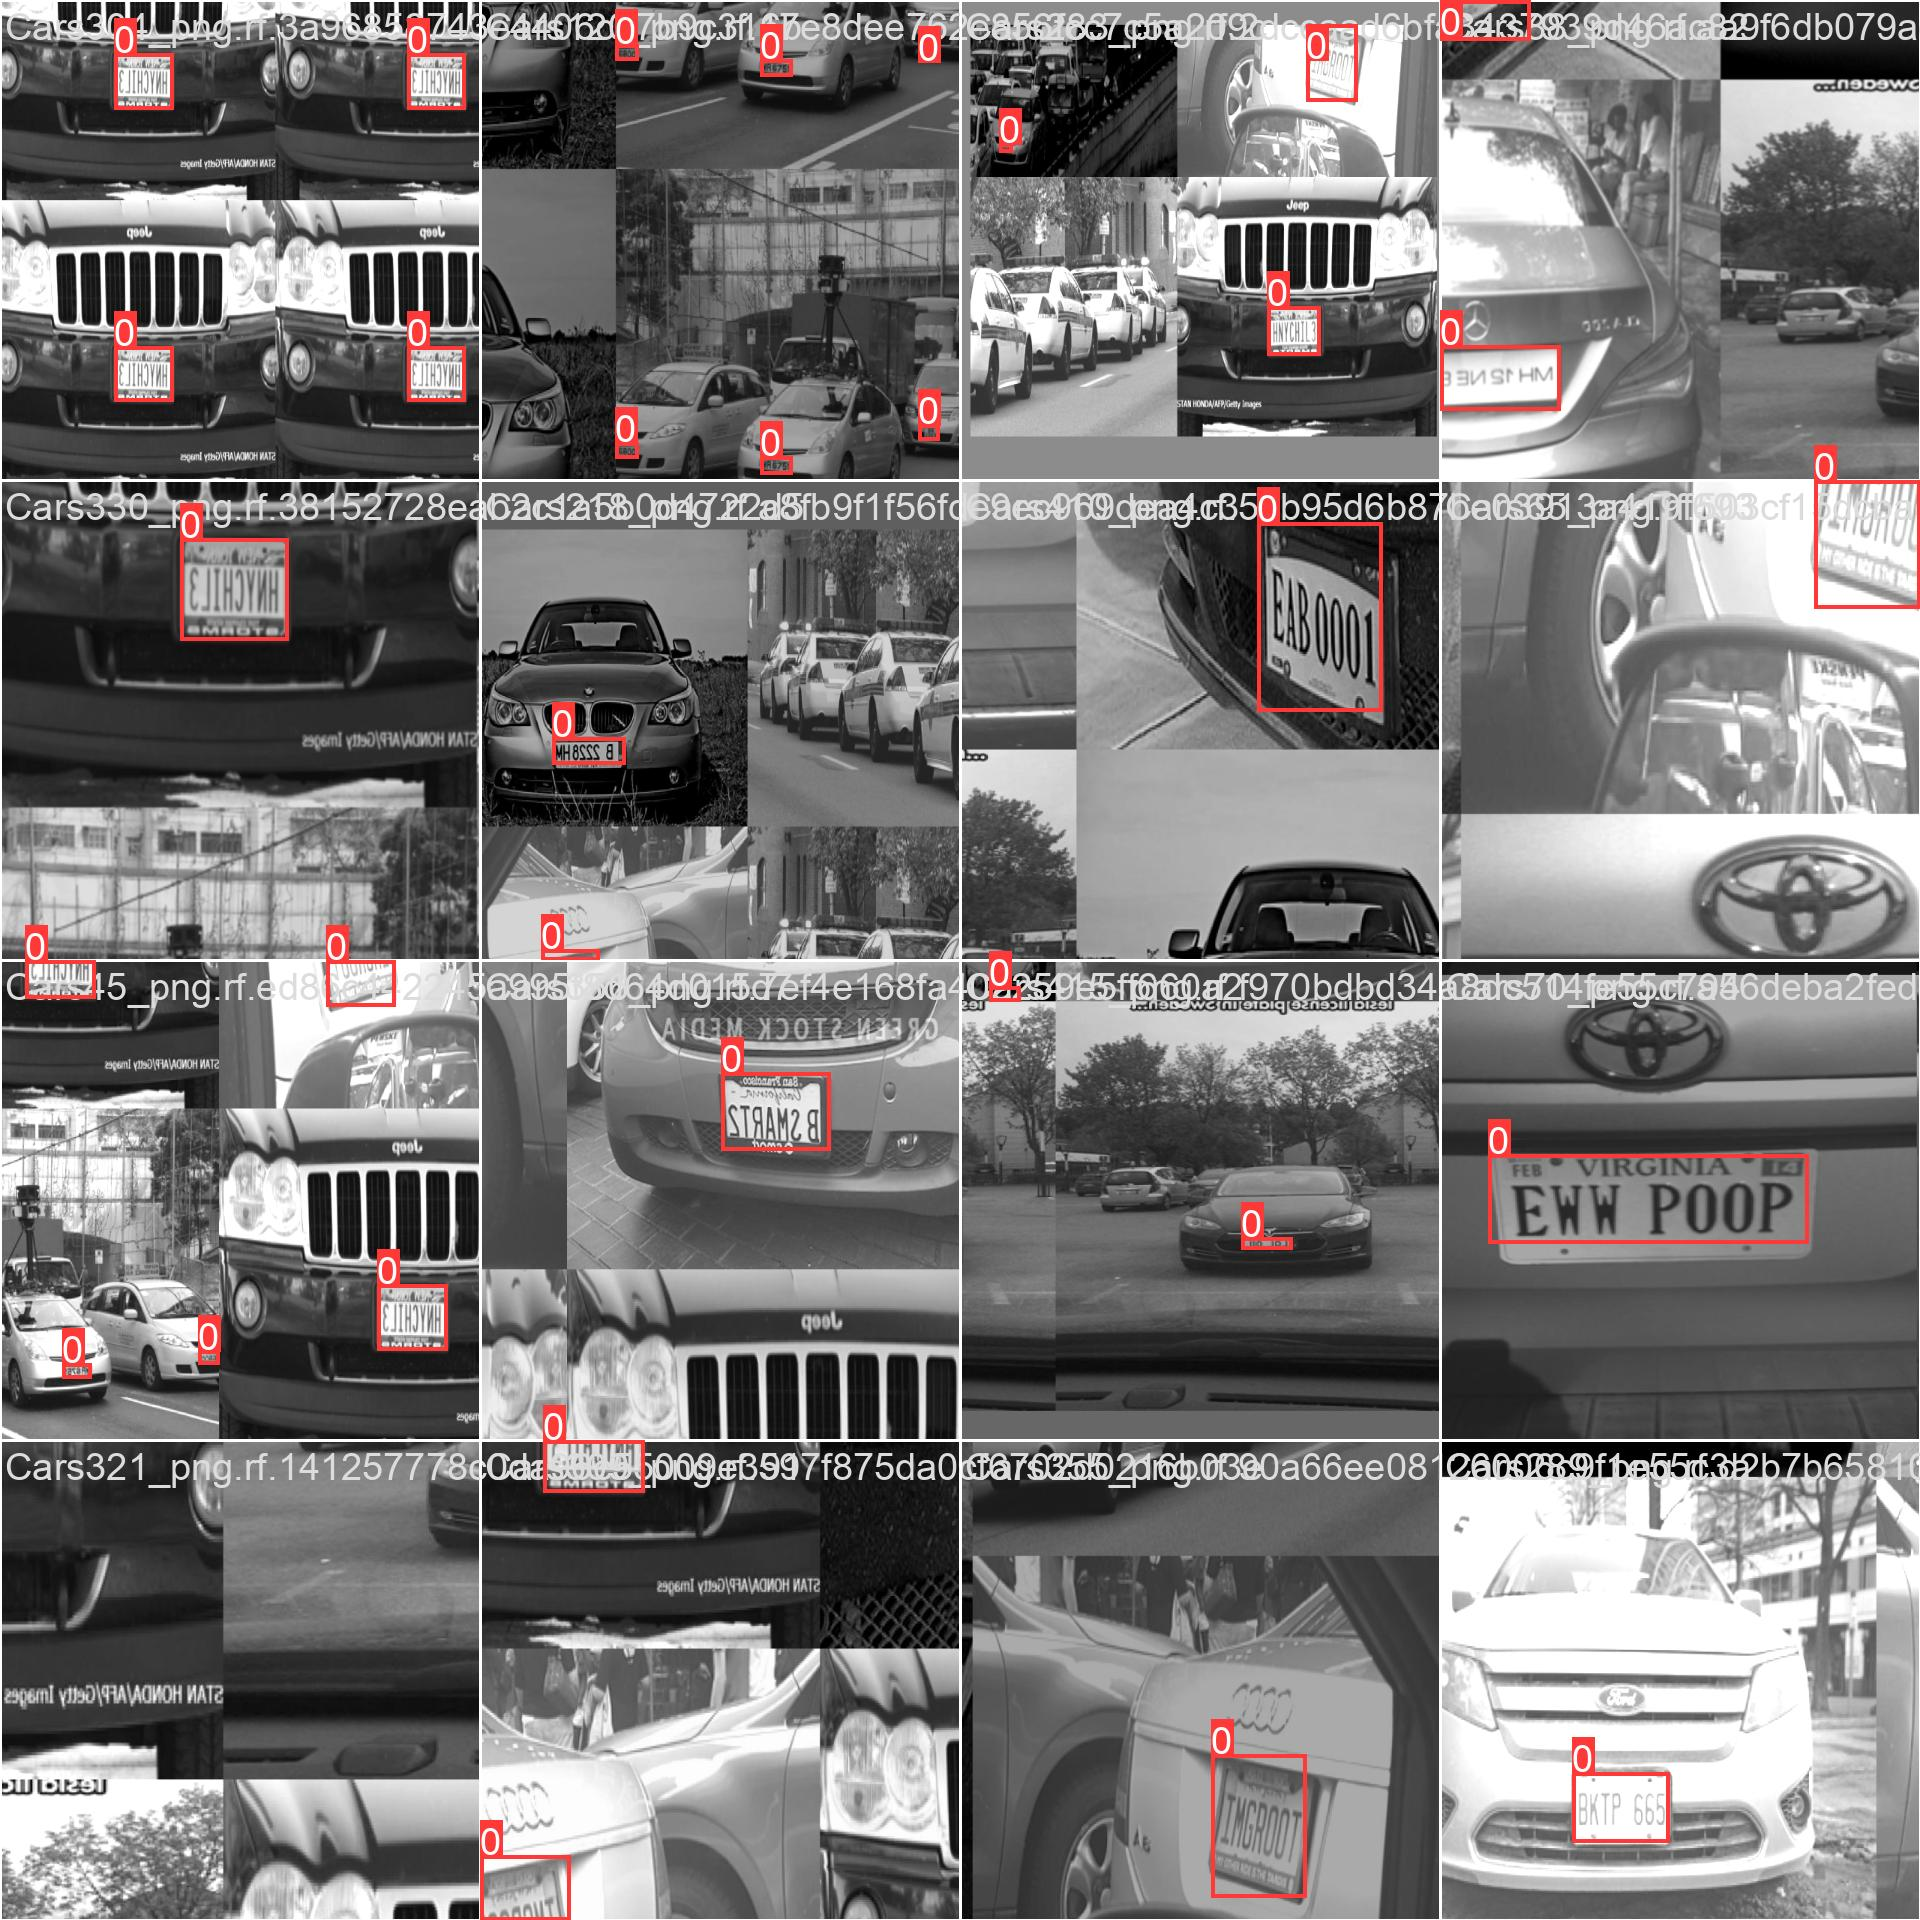

In [16]:
Image("/content/yolov10/runs/detect/train/train_batch0.jpg")

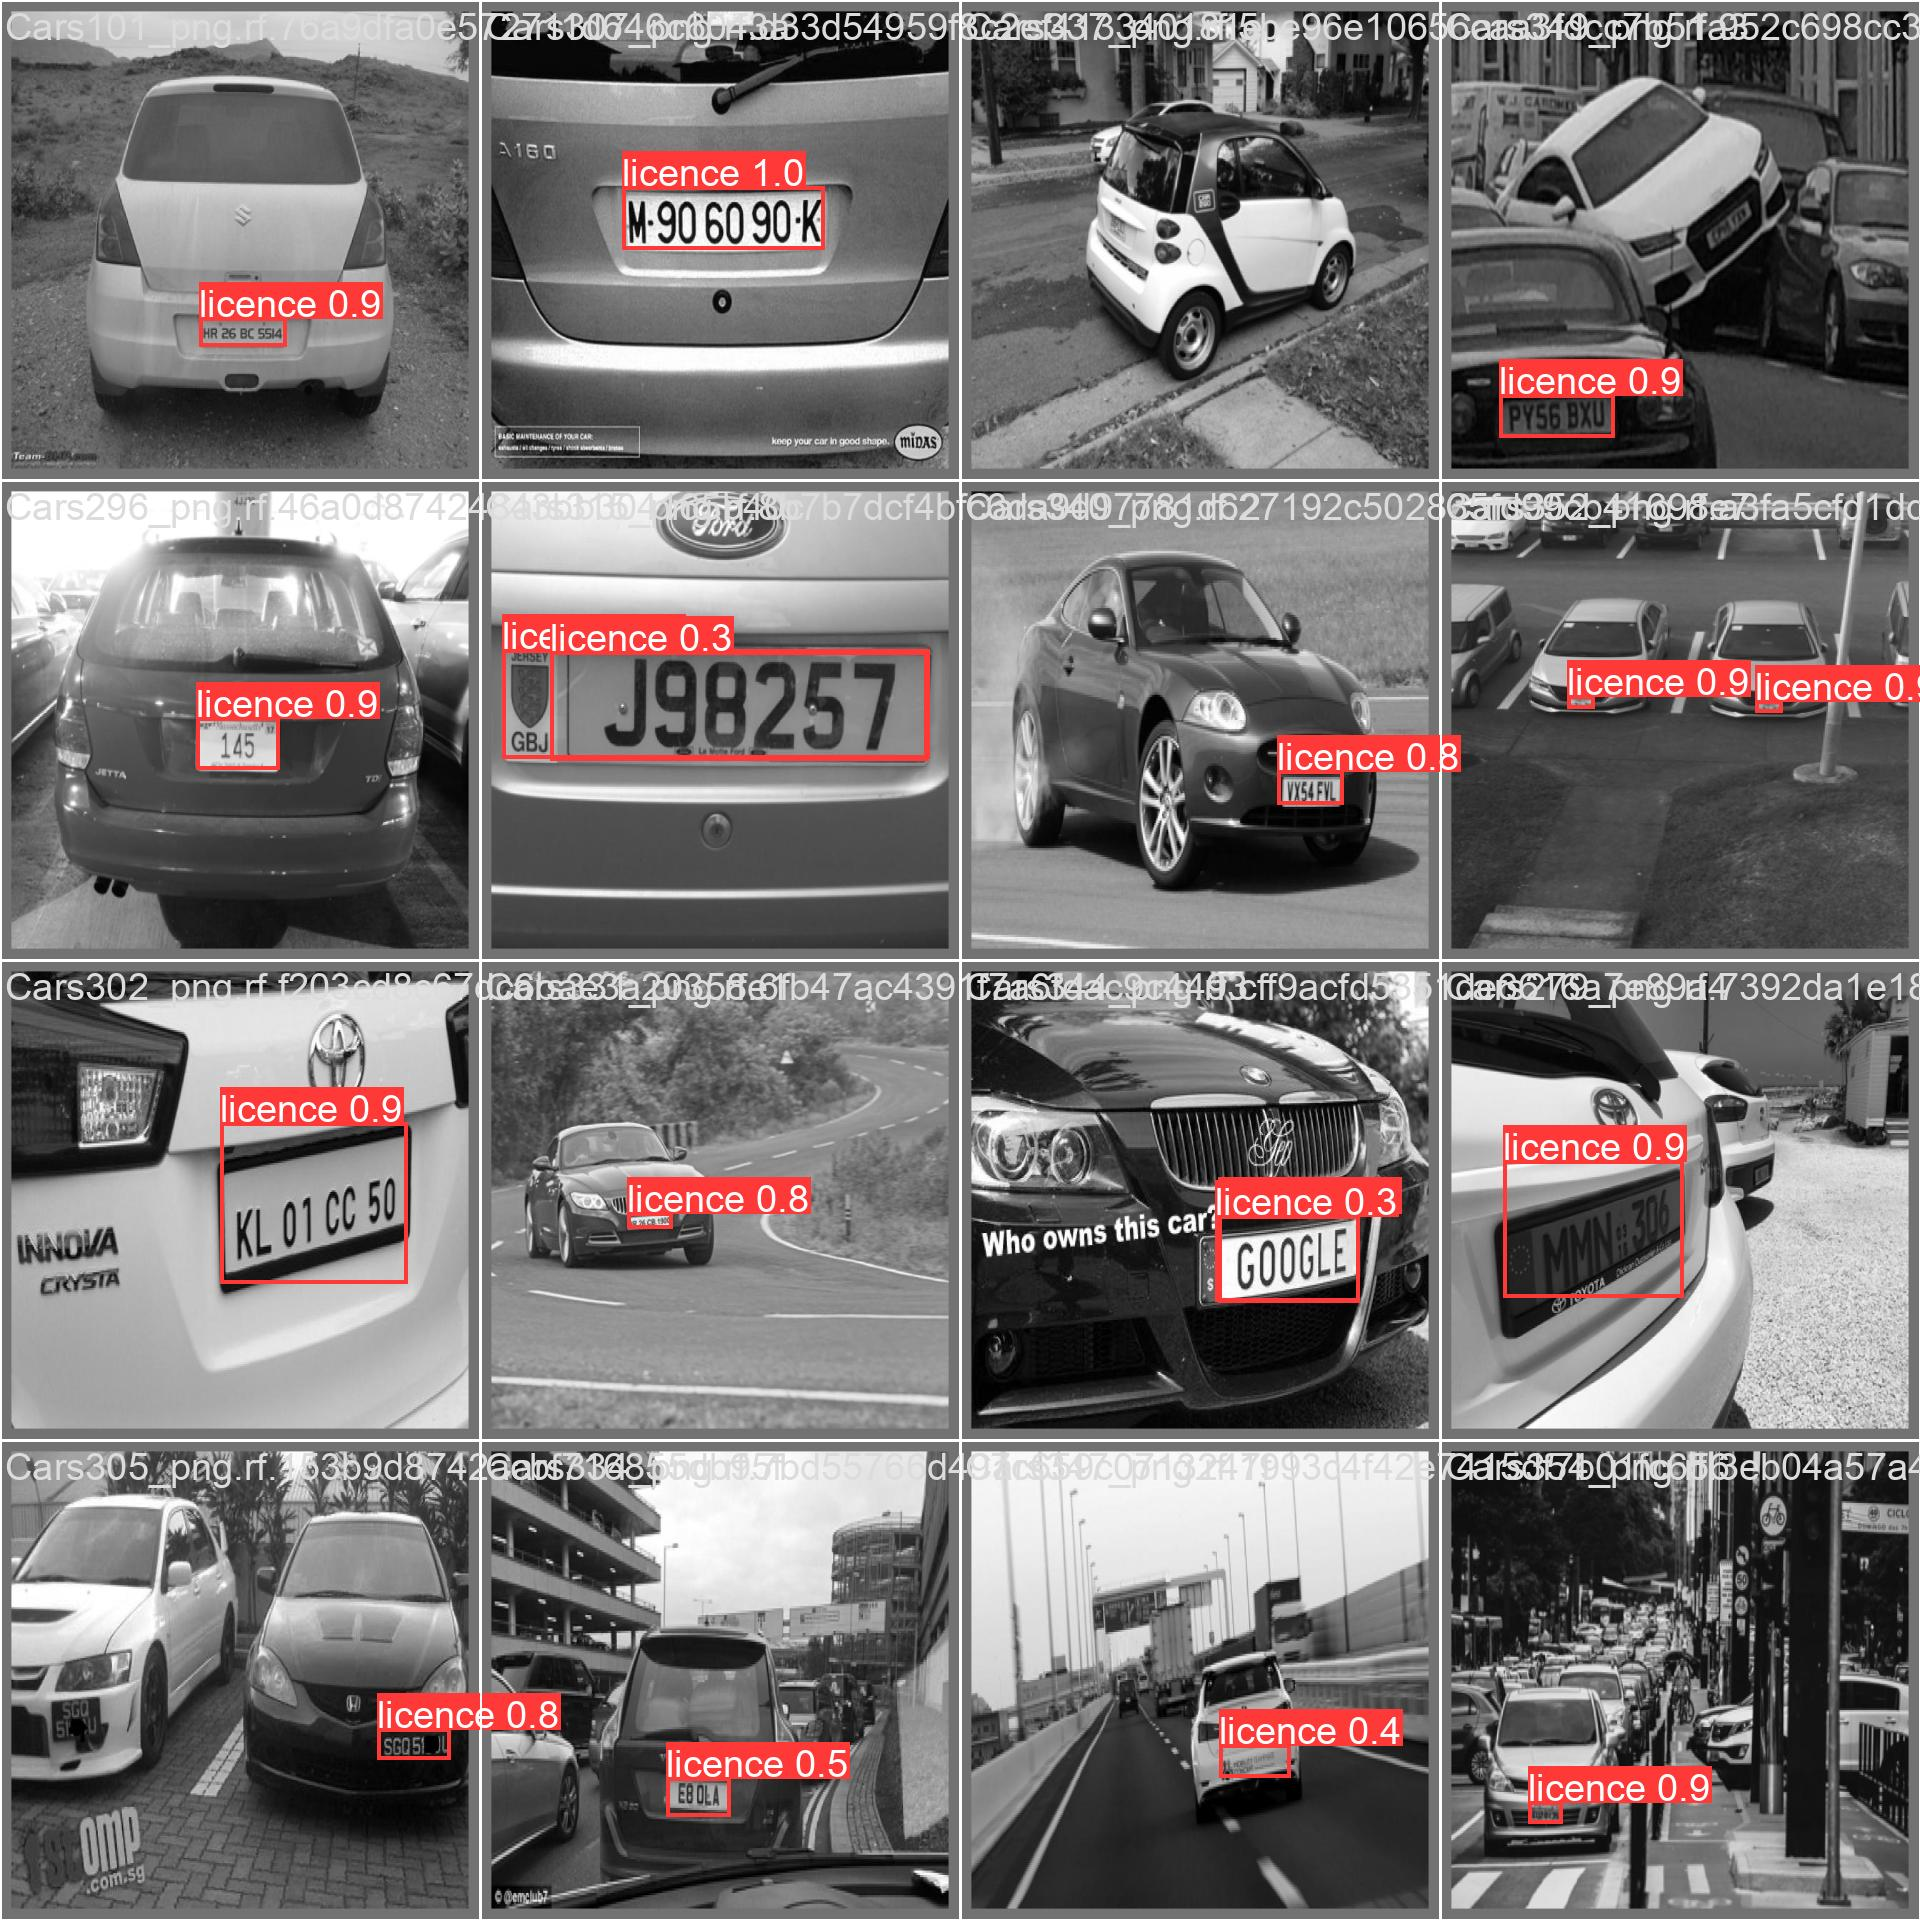

In [17]:
Image("/content/yolov10/runs/detect/train/val_batch0_pred.jpg")

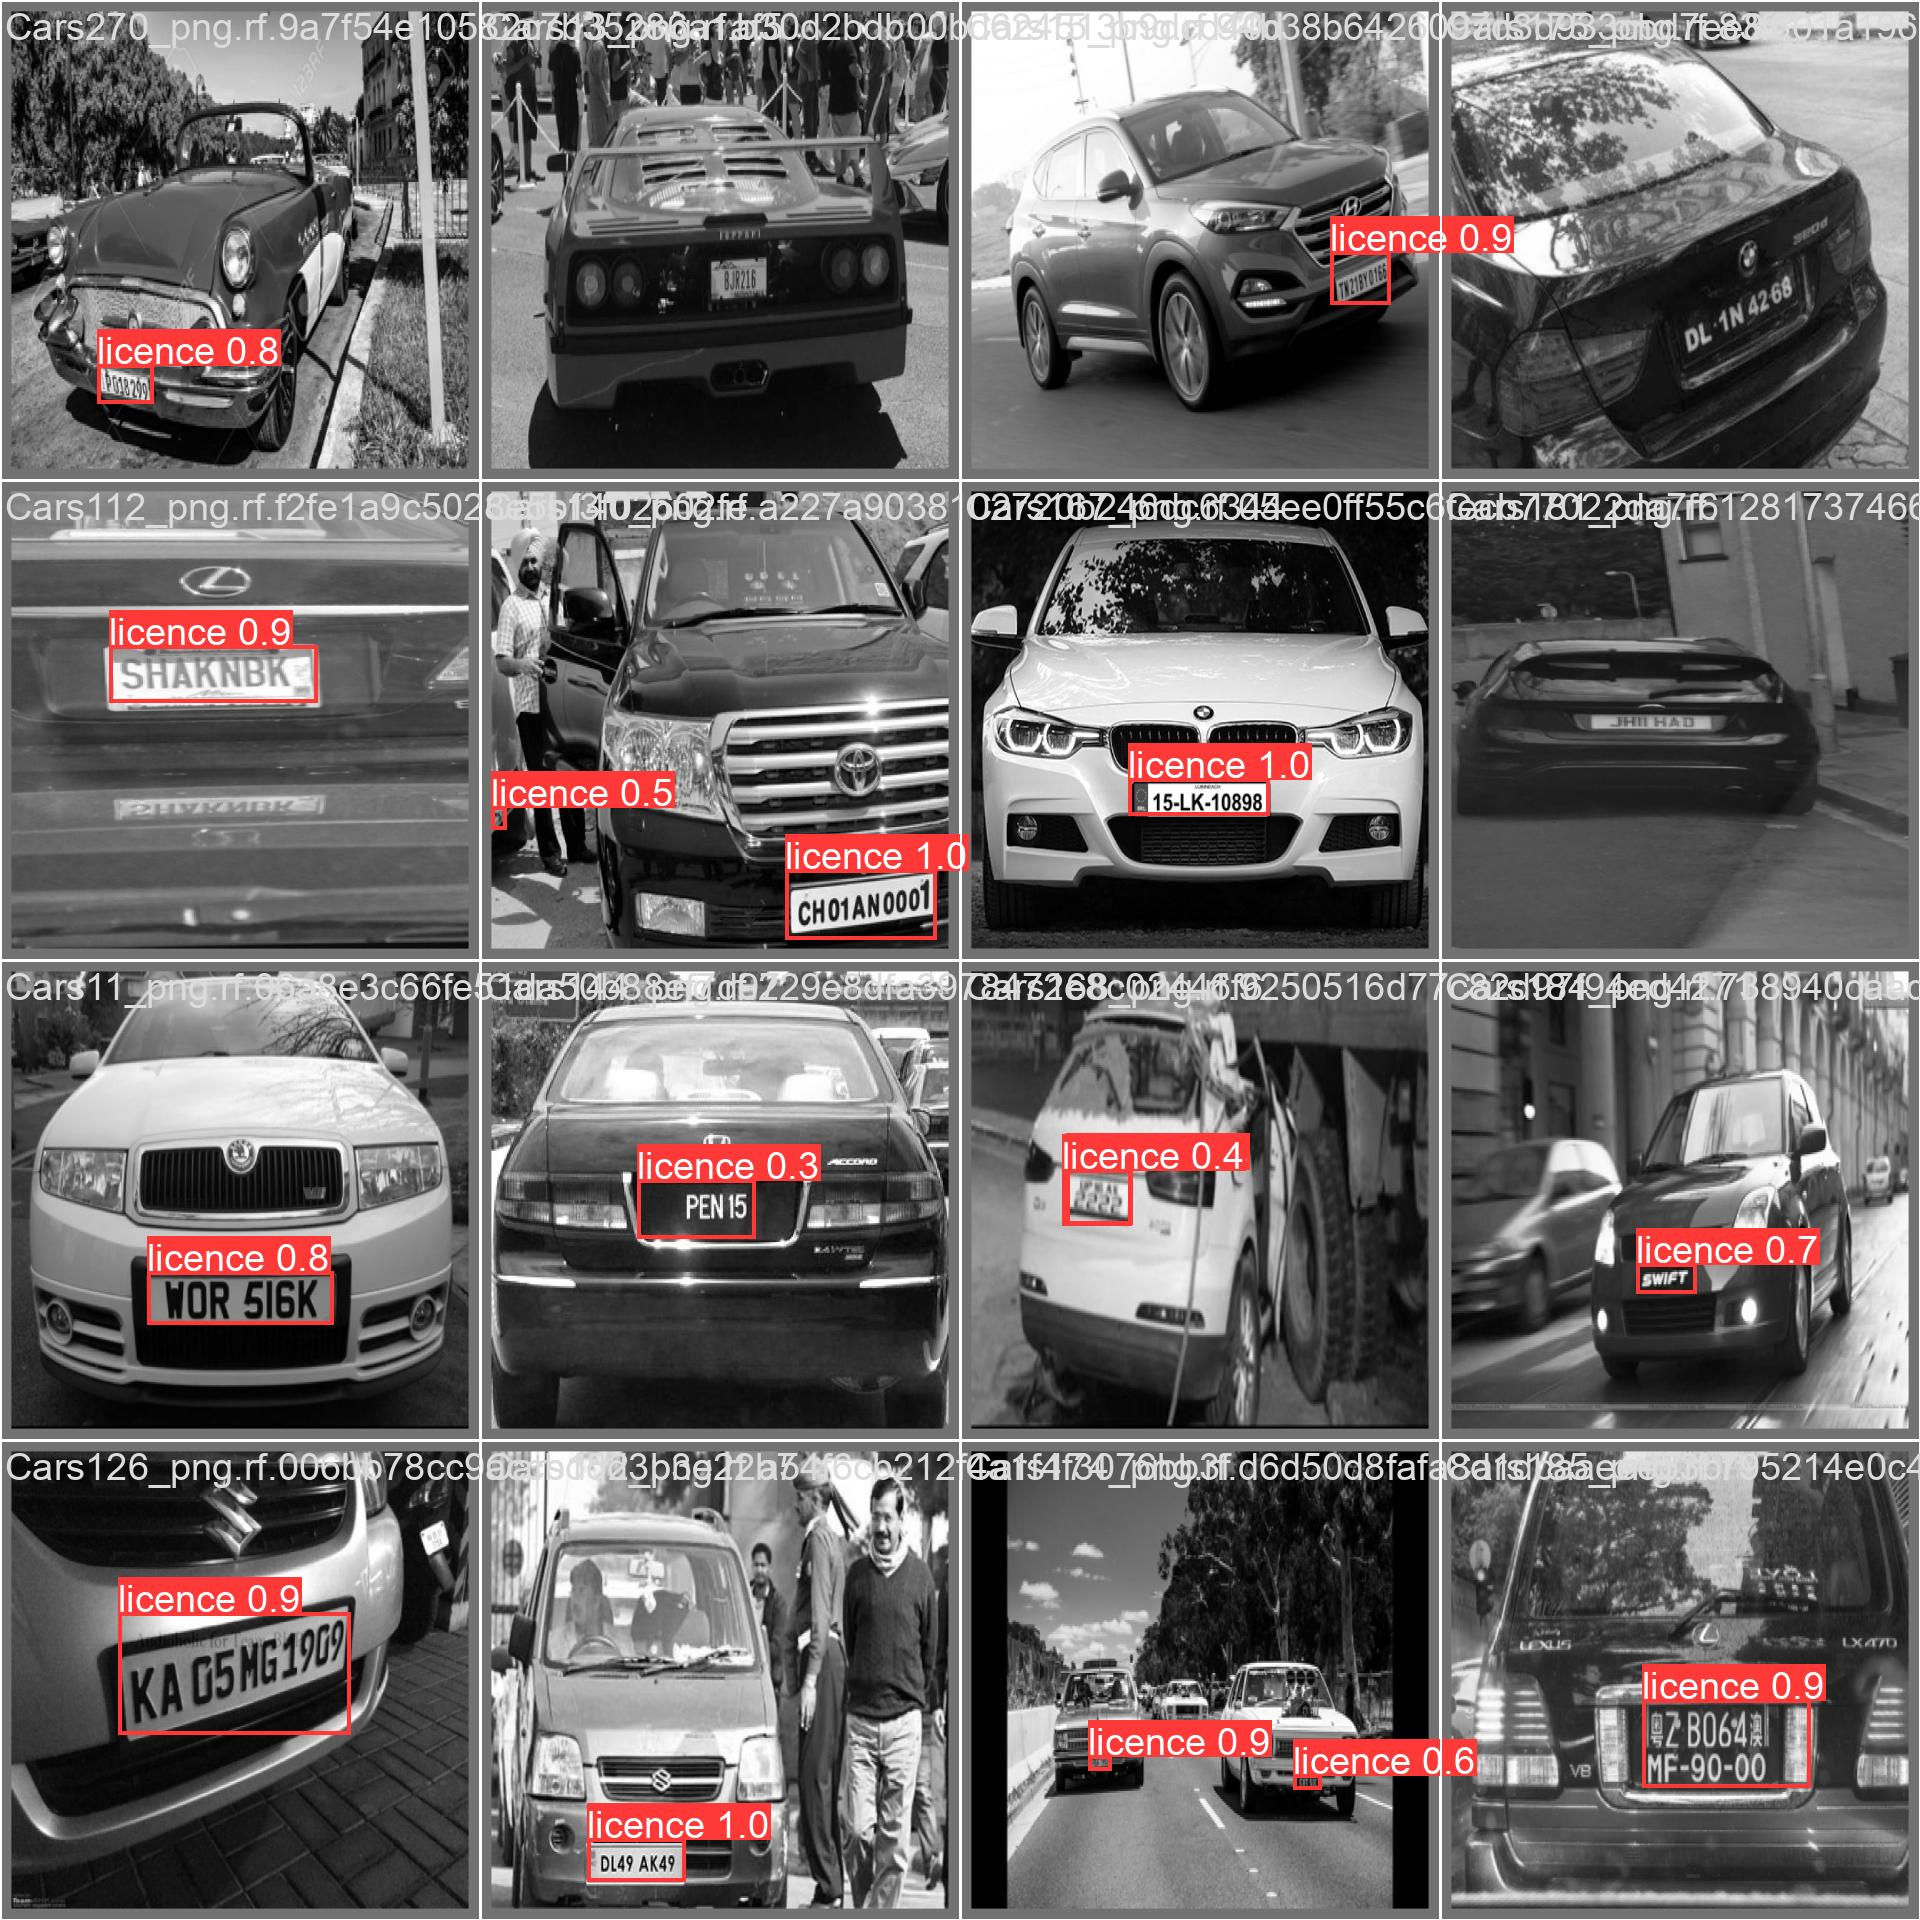

In [18]:
Image("/content/yolov10/runs/detect/train/val_batch1_pred.jpg")

#**Step 07: Download the Model Weights from Drive**

In [ ]:
!gdown "https://drive.google.com/uc?id=132Wdk5jptRfgNoav8vePYk9chBwiDHDc&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=132Wdk5jptRfgNoav8vePYk9chBwiDHDc&confirm=t
To: /content/yolov10/best.pt
100% 5.77M/5.77M [00:00<00:00, 23.8MB/s]


#**Step 08: Inference on Image**

In [19]:
!gdown "https://drive.google.com/uc?id=15wQmUQu4YnsinJswkDe7zr1QU5Ulue9O&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=15wQmUQu4YnsinJswkDe7zr1QU5Ulue9O&confirm=t
To: /content/yolov10/carImage1.png
100% 358k/358k [00:00<00:00, 70.6MB/s]


In [21]:
!yolo task=detect mode=predict conf=0.25 save=True model='/content/yolov10/runs/detect/train/weights/best.pt' source='carImage1.png'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

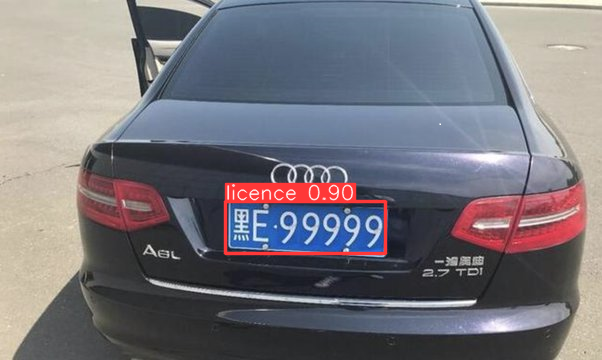

In [23]:
from IPython.display import Image
Image(filename='runs/detect/predict/carImage1.png')


In [24]:
!gdown "https://drive.google.com/uc?id=12X-xluoK8zK36F6mudICff2ZjgpQ6Qal&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=12X-xluoK8zK36F6mudICff2ZjgpQ6Qal&confirm=t
To: /content/yolov10/carImage2.png
100% 139k/139k [00:00<00:00, 78.2MB/s]


In [25]:
!yolo task=detect mode=predict conf=0.25 save=True model='/content/yolov10/runs/detect/train/weights/best.pt' source='carImage2.png'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

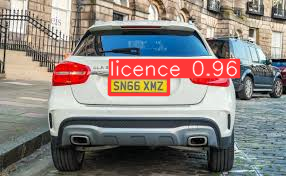

In [26]:
from IPython.display import Image
Image(filename='runs/detect/predict2/carImage2.png')


#**Step 09: Download the Demo Videos**

In [27]:
!gdown "https://drive.google.com/uc?id=11Cd4ScvMj3yAvYDrQBERj7Oz7oVGmMka&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11Cd4ScvMj3yAvYDrQBERj7Oz7oVGmMka&confirm=t
To: /content/yolov10/1.mp4
100% 2.38M/2.38M [00:00<00:00, 184MB/s]


In [28]:
!gdown "https://drive.google.com/uc?id=14CTYNzHsQJdnRbKdvB3bA_7CTzUrHHm9&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=14CTYNzHsQJdnRbKdvB3bA_7CTzUrHHm9&confirm=t
To: /content/yolov10/demo.mp4
100% 9.56M/9.56M [00:00<00:00, 10.1MB/s]


#**Step 10: Inference on Video**

In [29]:
!yolo task=detect mode=predict conf=0.25 save=True model='/content/yolov10/runs/detect/train/weights/best.pt' source='demo.mp4'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [32]:
!yolo task=detect mode=predict conf=0.25 save=True model='/content/yolov10/runs/detect/train/weights/best.pt' source='1.mp4'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO